# Aleph insights wednesday 19th february interview

In [1]:
#import libraries that might be needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap

In [2]:
#load dataset
aleph = pd.read_excel("Copy of globalterrorismdb_0919dist.xlsx")

In [3]:
#make a new killandwound feature by adding nkill and nwound and make a 0/1 variable for logistic regression in data science part
aleph['killandwound']=aleph['nkill']+aleph['nwound']
aleph['kwfinal'] = aleph['killandwound'].apply(lambda x: 0 if x == 0 else 1)

In [4]:
#make a original copy of the dataframe 
alephcopy = aleph.copy()

In [5]:
#check head of the dataset
aleph.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,killandwound,kwfinal
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1.0,1
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,0.0,0
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0,1
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN,1
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN,1


In [6]:
#check the column names
aleph.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY', 'related', 'killandwound', 'kwfinal'],
      dtype='object', length=137)

In [7]:
# describe the dataset
aleph.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,killandwound,kwfinal
count,1.914640e+05,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,186884.000000,186883.000000,191463.000000,...,8.380000e+02,611.000000,12045.000000,11454.000000,191464.000000,191464.000000,191464.000000,191464.000000,173279.000000,191464.000000
mean,2.003486e+11,2003.420136,6.462510,15.507688,0.047476,131.290446,7.205167,23.462121,28.902126,1.458172,...,6.961705e+05,217.004910,4.643005,-29.816309,-4.521727,-4.439247,0.088951,-3.930582,5.294144,0.655622
std,1.334949e+09,13.349405,3.388515,8.807727,0.212656,112.058063,2.923811,18.405309,57.231040,0.991536,...,9.792528e+06,2796.042504,2.034429,65.183303,4.543713,4.639931,0.556741,4.689726,48.681758,0.475166
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,1.991083e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,6.000000,11.274796,7.052742,1.000000,...,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000
50%,2.010031e+11,2010.000000,6.000000,15.000000,0.000000,98.000000,7.000000,31.445840,43.471427,1.000000,...,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000,1.000000
75%,2.015013e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.621521,68.783077,1.000000,...,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,2.018123e+11,2018.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,2.750000e+08,48000.000000,7.000000,2912.000000,1.000000,1.000000,1.000000,1.000000,12263.000000,1.000000


In [8]:
#how much of the dataset is null - Alot :( Yellow means missing - purple means complete)

In [9]:
#check there are no duplicates in the dataset.  There are 0.
print('Number of duplicates:', aleph.duplicated().sum())
aleph.isnull().sum()

Number of duplicates: 0


eventid              0
iyear                0
imonth               0
iday                 0
approxdate      181172
                 ...  
INT_MISC             0
INT_ANY              0
related         164766
killandwound     18185
kwfinal              0
Length: 137, dtype: int64

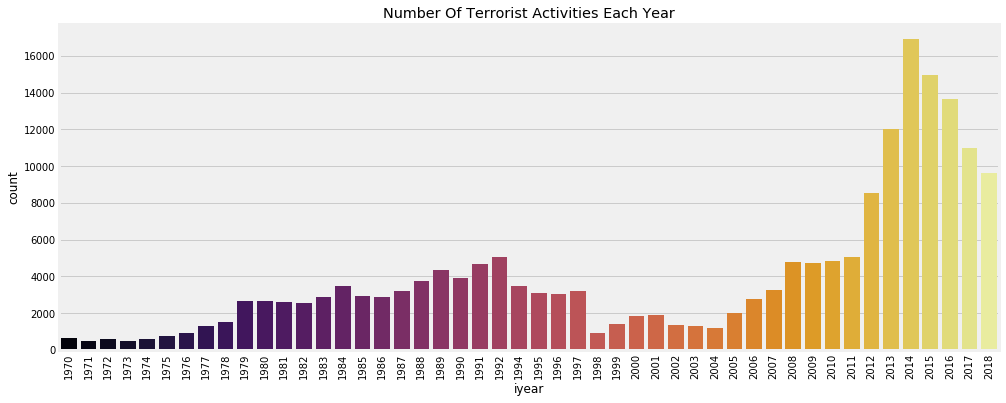

In [10]:
#a bar chart by seaborn to demonstrate the number of terrorist events against year throughout the whole dataset -(nb. 1993 missing)
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=aleph,palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [11]:
#check percentage of gname that is null - was 45% -
len(aleph[aleph['gname']=="Unknown"])/len(aleph)*100

45.053378180754606

In [12]:
#Filter the last 20 years (2 decades) of the database

In [13]:
aleph = aleph[aleph.iyear.isin(["1998","1999","2000","2001", "2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"])]

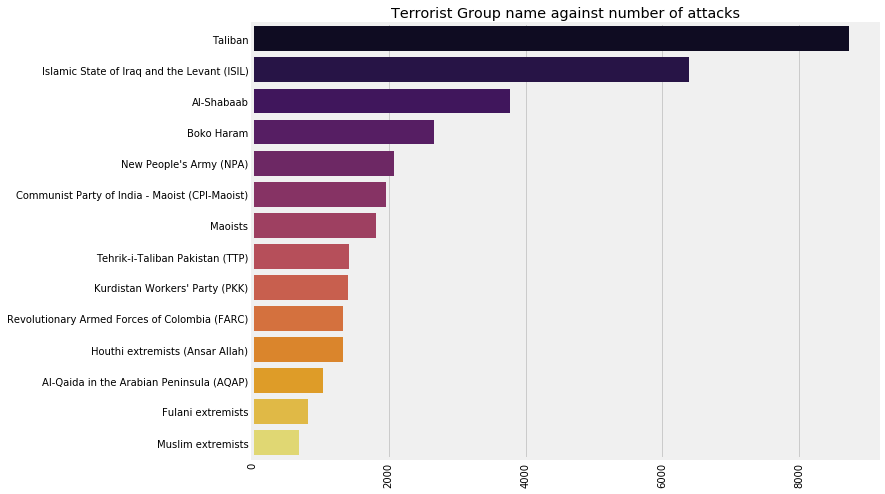

In [14]:
# seaborn plot of terrorist groups with highest terror attacks - taliban are number 1 (afghanistan) followed by a group in iraq
sns.barplot(aleph['gname'].value_counts()[1:15].values,aleph['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Group name against number of attacks')
plt.show()

In [15]:
#Max/Min kills event group and date.
print('Maximum people killed in an attack are: ',aleph['nkill'].max(),'GROUP',aleph.loc[aleph['nkill'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nkill'].idxmax()].iyear,aleph.loc[aleph['nkill'].idxmax()].imonth)
print('Minimum people killed in an attack are: ',aleph['nkill'].min(),'GROUP',aleph.loc[aleph['nkill'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nkill'].idxmin()].iyear,aleph.loc[aleph['nkill'].idxmax()].imonth)

Maximum people killed in an attack are:  1570.0 GROUP Islamic State of Iraq and the Levant (ISIL) Year/Month: 2014 6
Minimum people killed in an attack are:  0.0 GROUP Unknown Year/Month: 1998 6


In [16]:
#Max/Min wounded event group and date.
print('Maximum people wounded in an attack are: ',aleph['nwound'].max(),'GROUP',aleph.loc[aleph['nwound'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)
print('Minimum people wounded in an attack are: ',aleph['nwound'].min(),'GROUP',aleph.loc[aleph['nwound'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)

Maximum people wounded in an attack are:  10878.0 GROUP Al-Qaida Year/Month: 2001 9
Minimum people wounded in an attack are:  0.0 GROUP Loyalist Volunteer Forces (LVF) Year/Month: 2001 9


In [17]:
#Max/min killandwounded event group and date.
print('Maximum people wounded in an attack are: ',aleph['killandwound'].max(),'GROUP',aleph.loc[aleph['killandwound'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)
print('Minimum people wounded in an attack are: ',aleph['killandwound'].min(),'GROUP',aleph.loc[aleph['killandwound'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)

Maximum people wounded in an attack are:  12263.0 GROUP Al-Qaida Year/Month: 2001 9
Minimum people wounded in an attack are:  0.0 GROUP Unknown Year/Month: 2001 9


C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Terroist attacks with greater than 15 casualities')

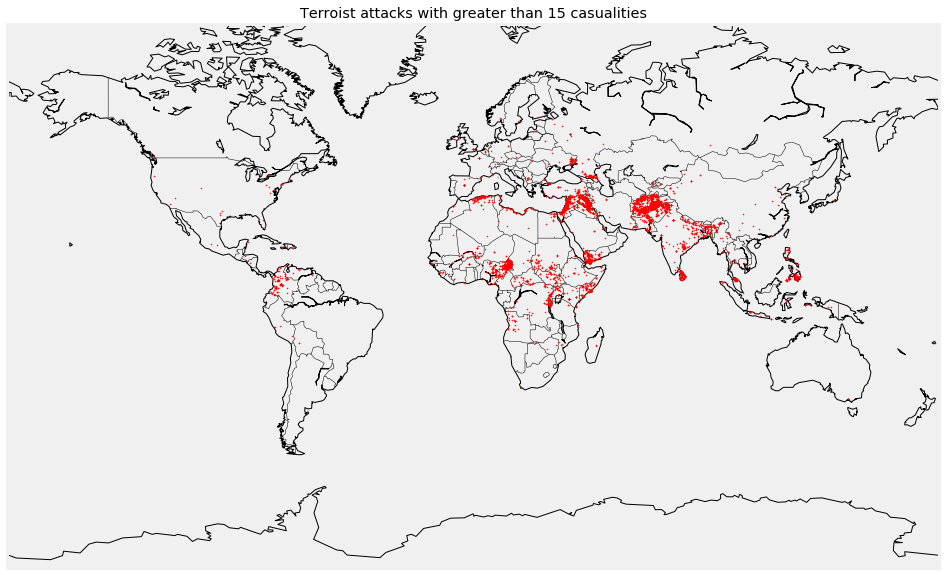

In [18]:
#Use basemap to hospot using latitude and longitude the places with kill and wounded over 15.
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(aleph[aleph['killandwound']>15].latitude)
long_100=list(aleph[aleph['killandwound']>15].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(23,10)
plt.title("Terroist attacks with greater than 15 casualities")

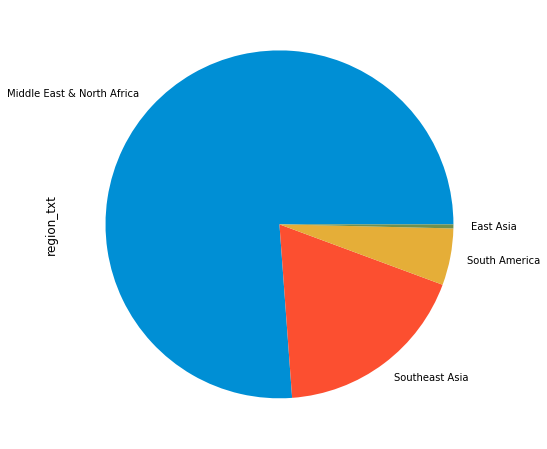

In [19]:
#plot of region pie chart where events happen.  The middle east and Southeast asia are the top 2.
fig, ax = plt.subplots() 
fig = plt.gcf()
fig.set_size_inches(8,8)
aleph['region_txt'].value_counts()[::3].plot(ax=ax, kind='pie')

Text(0.5, 0, 'Country')

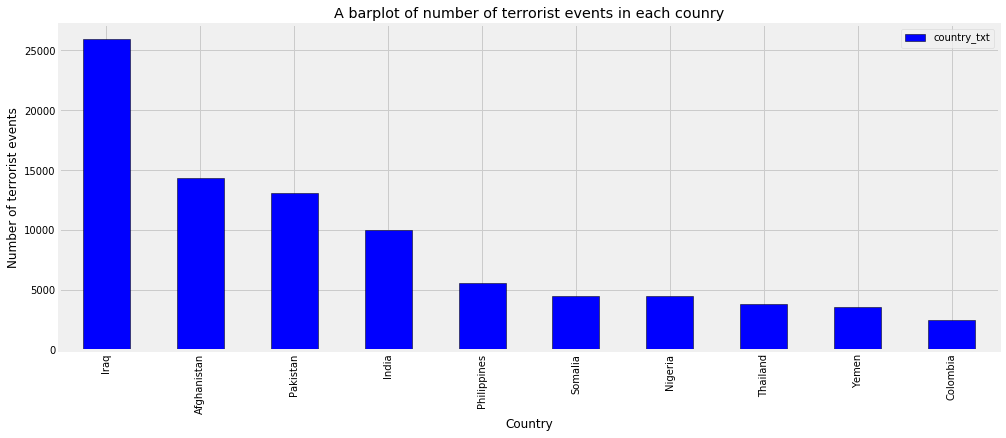

In [20]:
# plot of countries in events throughout the dataframe nb. Iraq most popular followed by Afghanistan!
fig, ax = plt.subplots(figsize=(15,6))
aleph['country_txt'].value_counts()[:10].plot(ax=ax, kind='bar',color='blue',edgecolor='black')
plt.legend()
plt.title('A barplot of number of terrorist events in each counry')
plt.ylabel('Number of terrorist events')
plt.xlabel('Country')


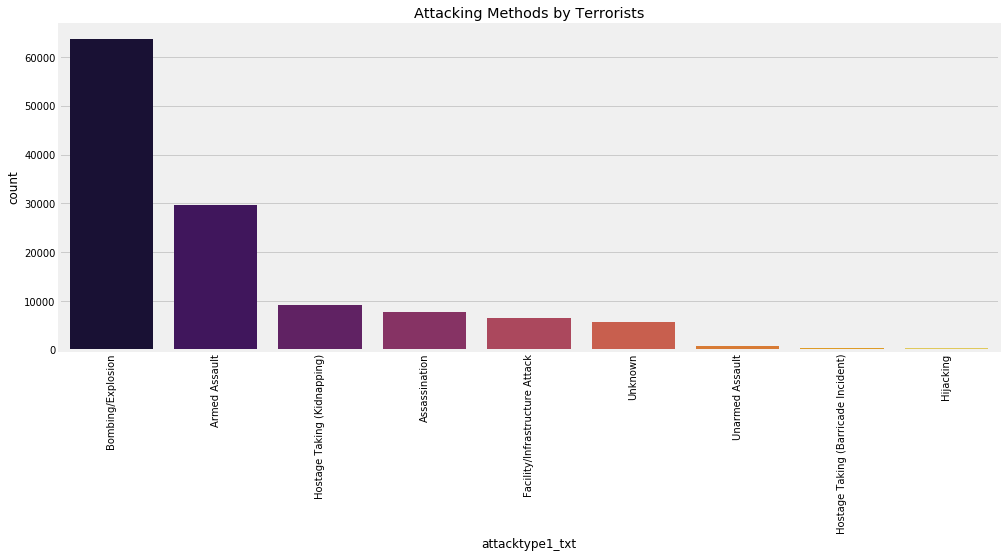

In [21]:
#Using seaborn to plot attack type versus count - nb. explosion , armed assault, then assasination are the top 3
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=aleph,palette='inferno',order=aleph['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

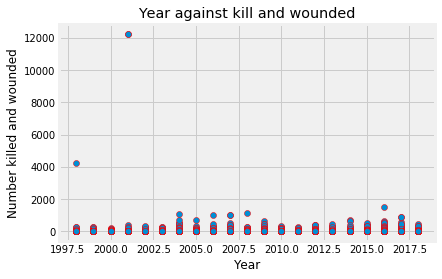

In [22]:
#Most events dont kill and injure over 1000.  Not many events kills thousands - most kill under a 1000.
plt.scatter(aleph['iyear'], aleph['killandwound'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Number killed and wounded')
plt.title('Year against kill and wounded')
plt.show()

In [23]:
#I used pandas cross tab feature to show the attack type versus the region.

In [24]:
pd.crosstab(aleph['region_txt'],aleph['attacktype1_txt'])

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,13,2,16,59,1,3,5,8,0
Central America & Caribbean,39,29,25,11,1,0,7,0,1
Central Asia,57,34,139,19,2,1,25,4,4
East Asia,51,4,112,22,5,1,2,18,2
Eastern Europe,1140,263,2329,241,5,17,174,63,97
Middle East & North Africa,7647,2381,28767,807,76,78,2545,123,1853
North America,187,56,191,332,6,7,20,62,1
South America,543,194,1475,262,18,11,444,16,101
South Asia,9975,2734,20179,2072,63,136,3325,254,2127


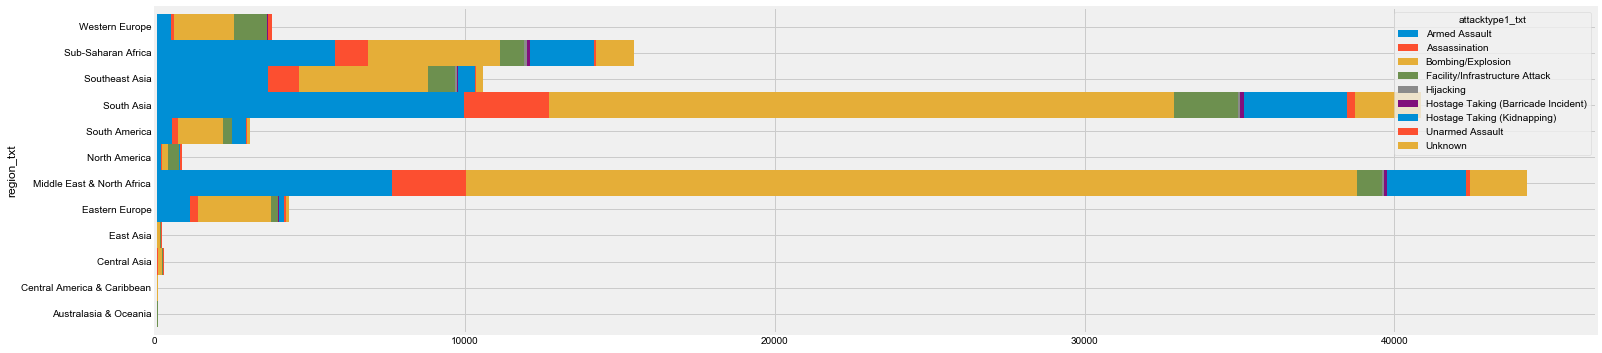

In [25]:
#plot a stacked bar chart using our pandas crosstab to show the biggest type of attack types in each region.  
#Bombing and explosions seem to be the most popular followed by armed assault.
ax = pd.crosstab(aleph['region_txt'],aleph['attacktype1_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(23,6)
#ax.grid(True, color = 'black')
ax = sns.set_style("whitegrid")
plt.show()

In [26]:
pd.crosstab(aleph['region_txt'], aleph['targtype1_txt'])


targtype1_txt,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
region_txt,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,0,3,30,3,0,4,15,1,0,1,...,11,11,24,0,0,0,2,1,1,0
Central America & Caribbean,0,1,2,1,0,4,38,17,1,1,...,14,24,4,0,0,0,3,0,1,2
Central Asia,0,1,18,5,0,23,66,10,0,19,...,54,49,7,2,2,2,11,5,4,0
East Asia,0,8,32,5,0,4,31,3,0,10,...,41,47,3,1,0,1,26,4,1,0
Eastern Europe,0,10,315,45,9,70,545,106,0,1086,...,770,758,148,12,14,7,224,103,71,5
Middle East & North Africa,0,121,3172,612,53,356,3548,512,38,8329,...,6101,14319,1125,40,1542,76,821,2258,794,254
North America,52,7,162,47,2,8,87,66,1,23,...,44,179,124,2,1,2,18,8,19,0
South America,0,19,467,25,12,26,320,82,7,343,...,408,631,66,16,6,15,174,62,363,0
South Asia,0,106,2762,1737,52,247,4908,389,21,5510,...,8238,9073,978,305,709,35,1476,2380,756,887


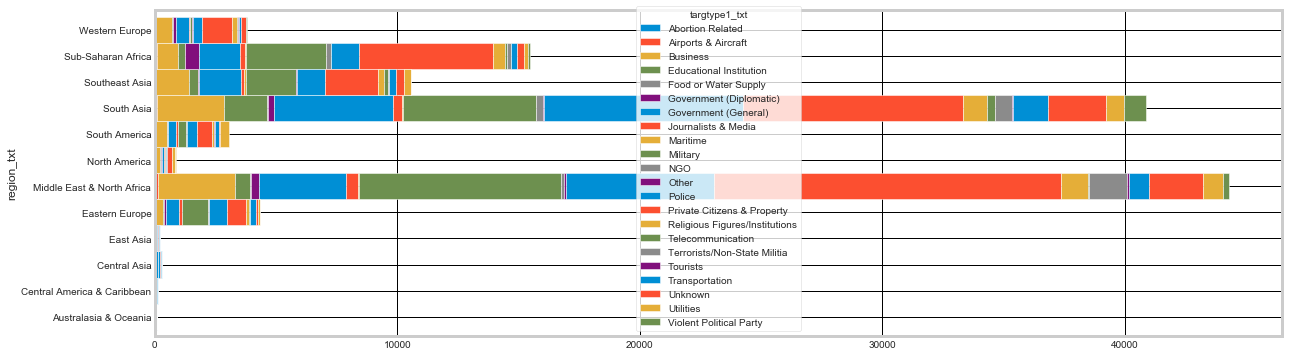

In [27]:
#Again using our pandas crosstab we look at the target types for the different regions.
#  Biggest bars in Middle east and south asia are Businesses and Educational Instutions.  In the middle east alot of military targets as well.
ax = pd.crosstab(aleph['region_txt'],aleph['targtype1_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(18,6)
ax.grid(True, color = 'black')
plt.show()

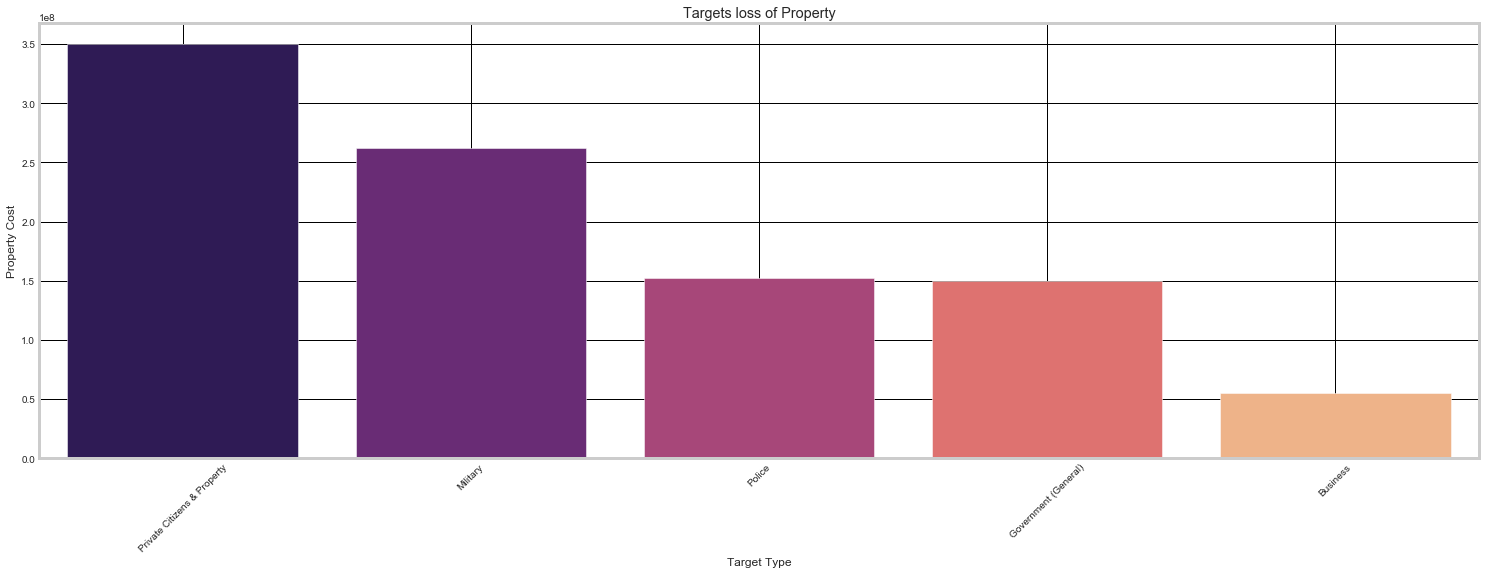

In [28]:
plt.figure(figsize=(23,8))
ax = sns.barplot(y = aleph.groupby(['targtype1_txt'])['propvalue'].sum().sort_values(ascending = False).reset_index()['propvalue'],
                 x = pd.Series(aleph['targtype1_txt'].value_counts().iloc[:5].index), palette='magma', label = True)
plt.xticks(rotation = 45)
ax.set_xlabel('Target Type')
ax.set_ylabel('Property Cost')
ax.set_title('Targets loss of Property')
ax.grid(True, color = 'black')

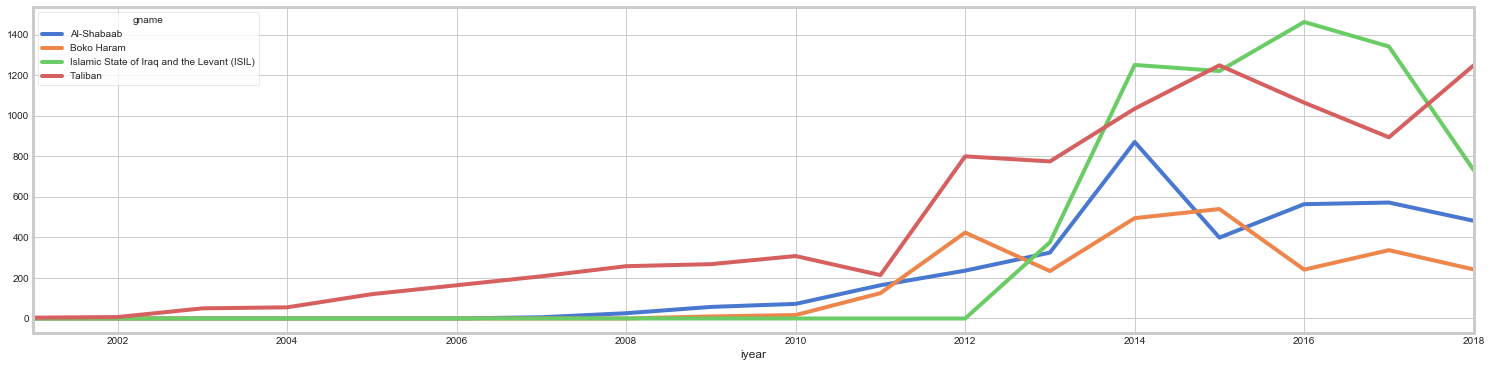

In [29]:
#lets do a better graph using crosstabs - to plot the top groups that are associated with the most events against year.  Since 2012 all of thse groups have become more prominent.
pd.crosstab(aleph[aleph['gname'].isin(aleph['gname'].value_counts()[1:5].index)]['iyear'],aleph[aleph['gname'].isin(aleph['gname'].value_counts()[1:5].index)]['gname']).plot(color=sns.color_palette('muted',10),figsize=(23,6))

In [30]:
#Lets filter out events caused by the taliban.  So we can look at them sepeartely.
talibanfilter = aleph.loc[aleph['gname'] == 'Taliban']

In [31]:
#lets filter out events caused by al qaeda.  So we can look at them sepeartely.
alqaedafilter = aleph.loc[aleph['gname'] == 'Al Qaeda']

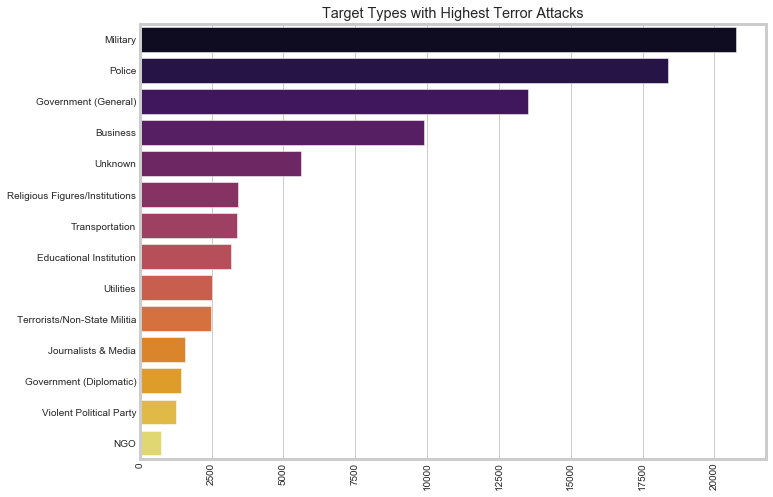

In [32]:
# seaborn plot of the biggest targets types looking at them all as a whole.  The military,police and government are the top 3.
sns.barplot(aleph['targtype1_txt'].value_counts()[1:15].values,aleph['targtype1_txt'].value_counts()[1:15].index,palette='inferno')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Target Types with Highest Terror Attacks')
plt.show()

Text(0.5, 1, 'aleph.corr()')

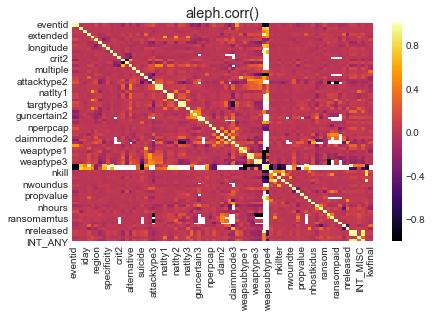

In [33]:
sns.heatmap(aleph.corr(),cmap='inferno')
plt.title('aleph.corr()')

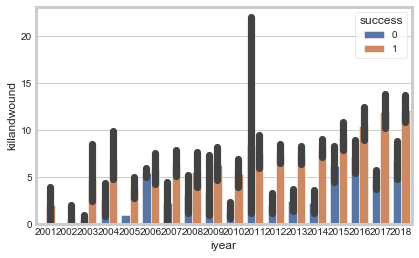

In [34]:
#success is a variable that is classed as 0 - intended target not killed or 1 - intended target killed
#as we can see taliban have done more attacks over the years than al qaeda but have had more unsuccesful ones. 
sns.barplot(x='iyear', y="killandwound", hue="success",data=talibanfilter, palette="deep")
sns.set(rc={'figure.figsize':(11.7,8.27)})

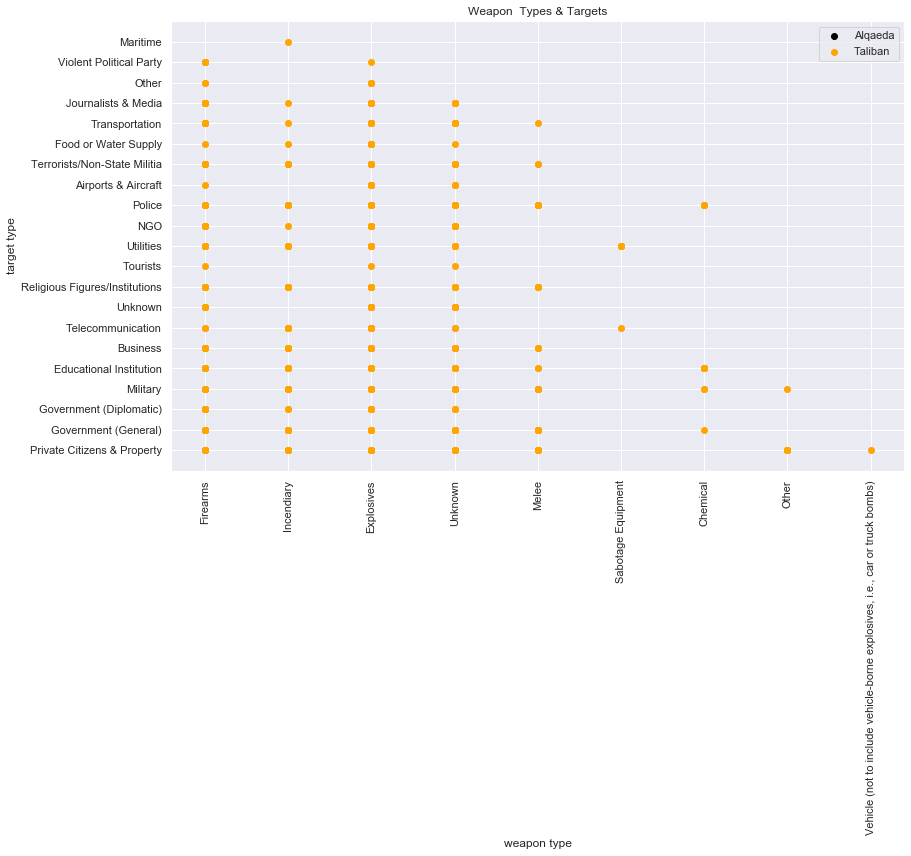

In [35]:
plt.scatter(alqaedafilter.weaptype1_txt, alqaedafilter.targtype1_txt, color="black", label="Alqaeda")
plt.scatter(talibanfilter.weaptype1_txt, talibanfilter.targtype1_txt, color="orange", label="Taliban")
plt.xticks(rotation=90)
plt.xlabel("weapon type")
plt.ylabel("target type")
plt.title("Weapon  Types & Targets")
plt.legend()
plt.show()

In [36]:
#Using some NLP.  Motive is a sentence which describes what caused the group do to do what they did.  
# Made sure that there are no unknown group events when we do this.
#  Make sure we dropped any duplicated motives - and sorted the words.
#  Made everything lowercase and removed any punctuation and backslashes.  

from wordcloud import WordCloud

In [37]:
aleph = aleph[aleph['gname']!='Unknown']

In [38]:
aleph = aleph[aleph['motive'].duplicated(keep = False)].sort_values('motive')

In [39]:
aleph = aleph.drop_duplicates('motive')

In [40]:
alqaedafilter = aleph.loc[aleph['gname'] == 'Al-Qaida']

In [41]:
talibanfilter = aleph.loc[aleph['gname'] == 'Taliban']

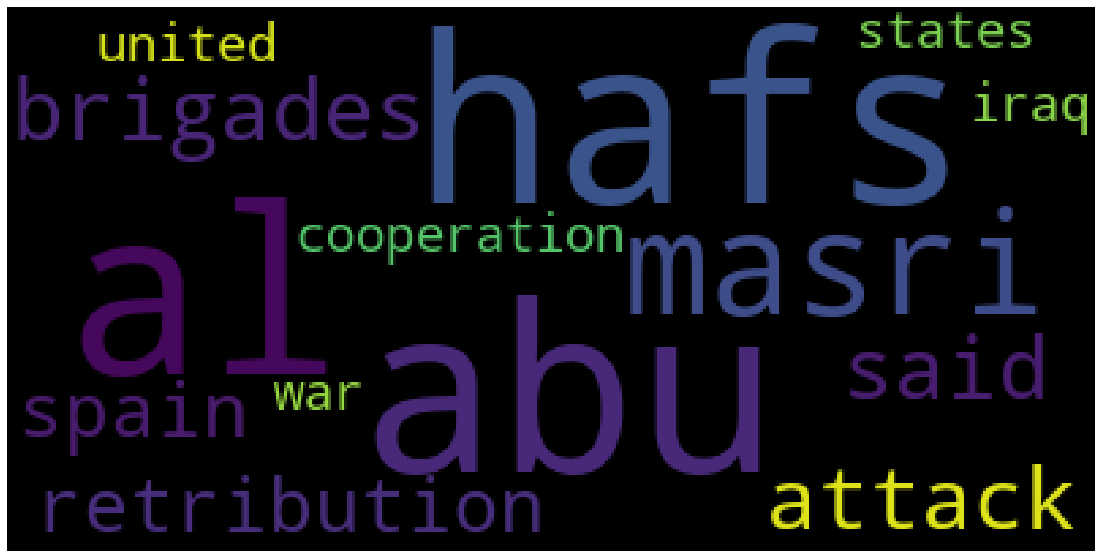

In [42]:
#  The bigger the word in the wordcloud the more prominent it appears in the motive.
#  So for alqaeda motives iraq, retribution, states, masri(Egypt).  
#  As we know alqaeda motives are all about the United States involvement in the problems in middle east.
motive = alqaedafilter['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordcloud = WordCloud().generate(motive)
plt.subplots(figsize=(23,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

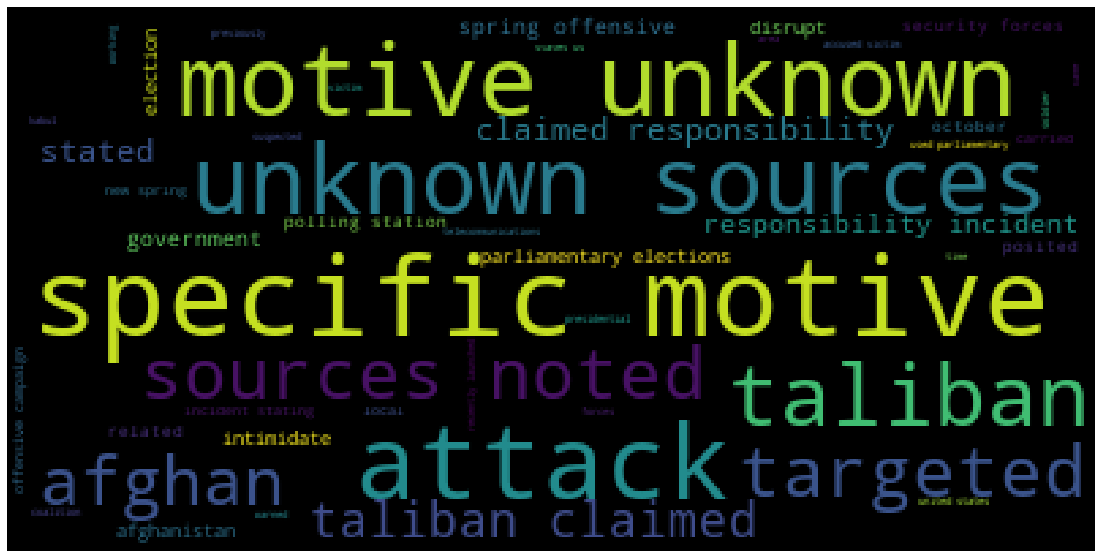

In [43]:
#  The wordart for the taliban motives hasnt given much away.   Alot of claimed responsibility, government, and Afghanistan.
motive = talibanfilter['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordcloud = WordCloud().generate(motive)
plt.subplots(figsize=(23,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
#Let use groupby the group name against the property damage and sort to see who caused the most damaged in property value.
property = aleph.groupby('gname')['propvalue'].sum().to_frame().reset_index().sort_values(by='propvalue')

In [45]:
property1 = property.sort_values(by='propvalue', ascending=False)[:5]

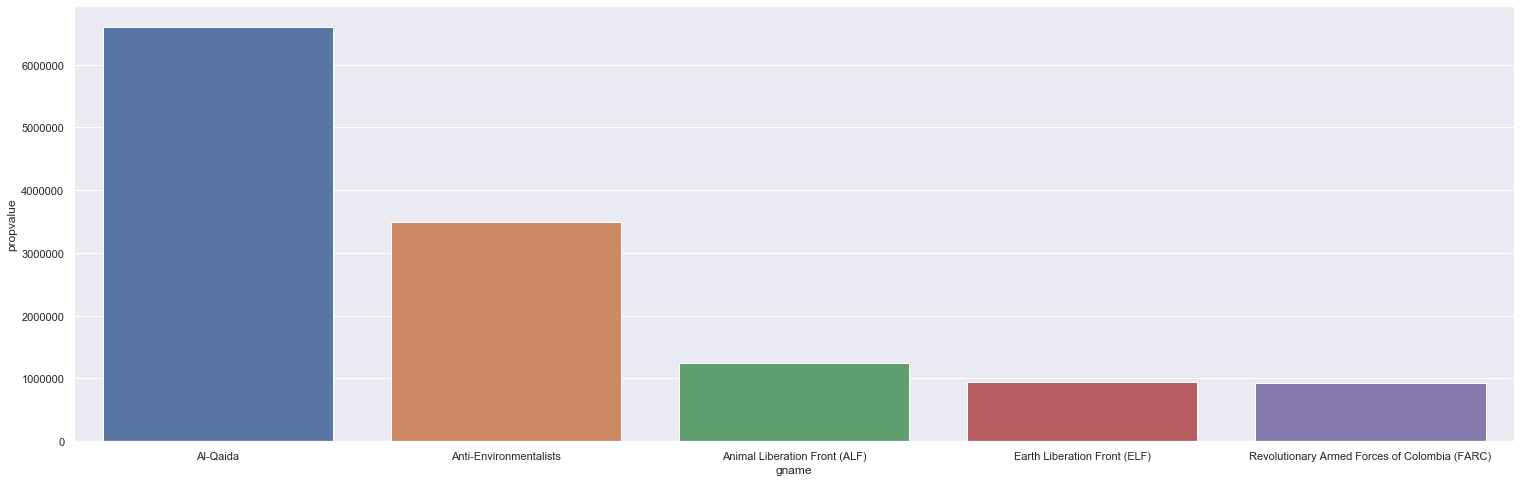

In [46]:
sns.set(rc={'figure.figsize':(23,8)})
sns.barplot(x='gname',y='propvalue',data=property1)

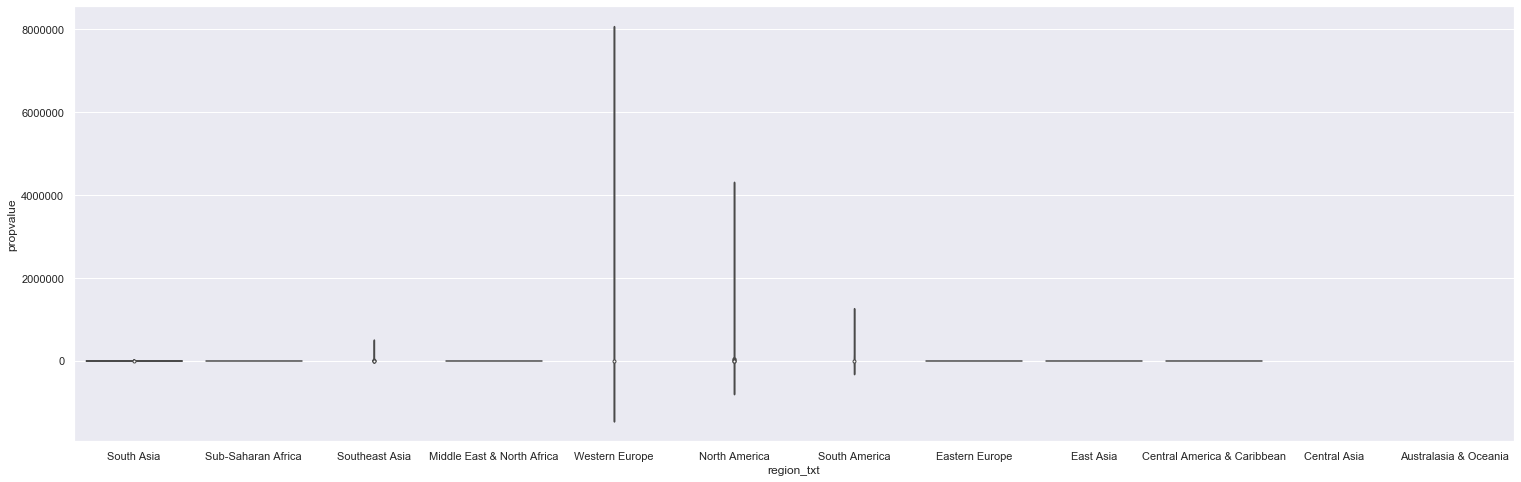

In [47]:
#i have attempted to use seaborn to do violinplot which didnt come out so good.  Western Europe and North America has the most property value damaged in the last 2 decades
sns.violinplot(x="region_txt", y="propvalue", data=aleph,palette='rainbow')

In [48]:
#I have made a new column to look work out the difference between the biggest ransom amount requested and the biggest ransom amount paid
#The smallest difference or biggest negative difference shows we didnt into the demands of the group.
#The largest difference shows that we didnt give into the demands of the group. 
aleph['ransomdiff']=aleph['ransomamt']-aleph['ransompaid']


In [49]:
ransom = aleph.groupby('gname')['ransomdiff'].sum().to_frame().reset_index().sort_values(by='ransomdiff')

In [50]:
ransom1 = ransom.sort_values(by='ransomdiff', ascending=True)[::-5]

In [51]:
#Highest and lowest ransom amounts requested
print('Highest ransom amount: ',aleph['ransomamt'].max(),'GROUP',aleph.loc[aleph['ransomamt'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransomamt'].idxmax()].iyear,aleph.loc[aleph['ransomamt'].idxmax()].imonth)
print('Lowest ransom amount: ',aleph['ransomamt'].min(),'GROUP',aleph.loc[aleph['ransomamt'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransomamt'].idxmin()].iyear,aleph.loc[aleph['ransomamt'].idxmin()].imonth)

Highest ransom amount:  13000000.0 GROUP Revolutionary Armed Forces of Colombia (FARC) Year/Month: 2000 7
Lowest ransom amount:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [52]:
#Highest and lowest ransom amounts paids
print('Highest ransom paid: ',aleph['ransompaid'].max(),'GROUP',aleph.loc[aleph['ransompaid'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmax()].iyear,aleph.loc[aleph['ransompaid'].idxmax()].imonth)
print('Lowest ransom paid: ',aleph['ransompaid'].min(),'GROUP',aleph.loc[aleph['ransompaid'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmin()].iyear,aleph.loc[aleph['ransompaid'].idxmin()].imonth)


Highest ransom paid:  1700000.0 GROUP Salafist Group for Preaching and Fighting (GSPC) Year/Month: 2003 2
Lowest ransom paid:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [53]:
#Highest difference between Ransom amount requested and highest ransom paid.
print('Highest ransom difference: ',aleph['ransomdiff'].max(),'GROUP',aleph.loc[aleph['ransomdiff'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransomdiff'].idxmax()].iyear,aleph.loc[aleph['ransomdiff'].idxmax()].imonth)
print('Lowest ransom paid: ',aleph['ransompaid'].min(),'GROUP',aleph.loc[aleph['ransompaid'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmin()].iyear,aleph.loc[aleph['ransompaid'].idxmin()].imonth)


Highest ransom difference:  13000099.0 GROUP Revolutionary Armed Forces of Colombia (FARC) Year/Month: 2000 7
Lowest ransom paid:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [54]:
aleph = aleph[~aleph['ransomamt'].isnull()]


# final conversion now worked
aleph[['ransomamt']] = aleph[['ransomamt']].astype(int)

In [55]:
aleph = aleph[~aleph['ransompaid'].isnull()]


# final conversion now worked
aleph[['ransompaid']] = aleph[['ransompaid']].astype(int)

In [56]:
aleph = aleph[~aleph['ransomdiff'].isnull()]


# final conversion now worked
aleph[['ransomdiff']] = aleph[['ransomdiff']].astype(int)

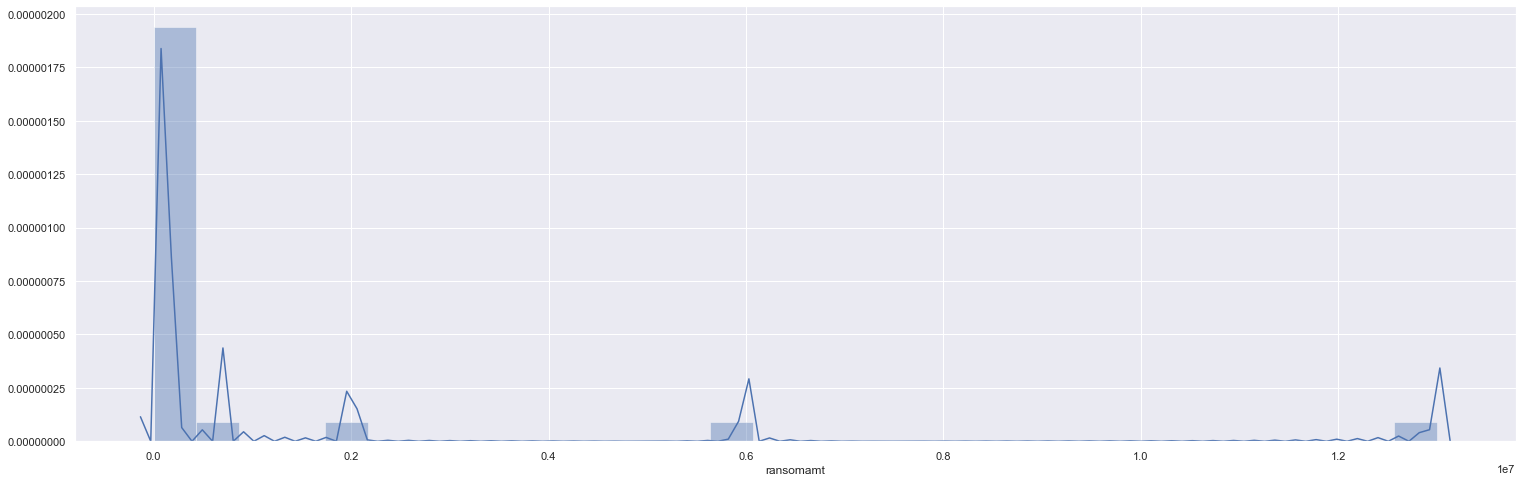

In [57]:
#Distribution plot of ransom amount requested
sns.distplot(aleph['ransomamt'],bins=30)


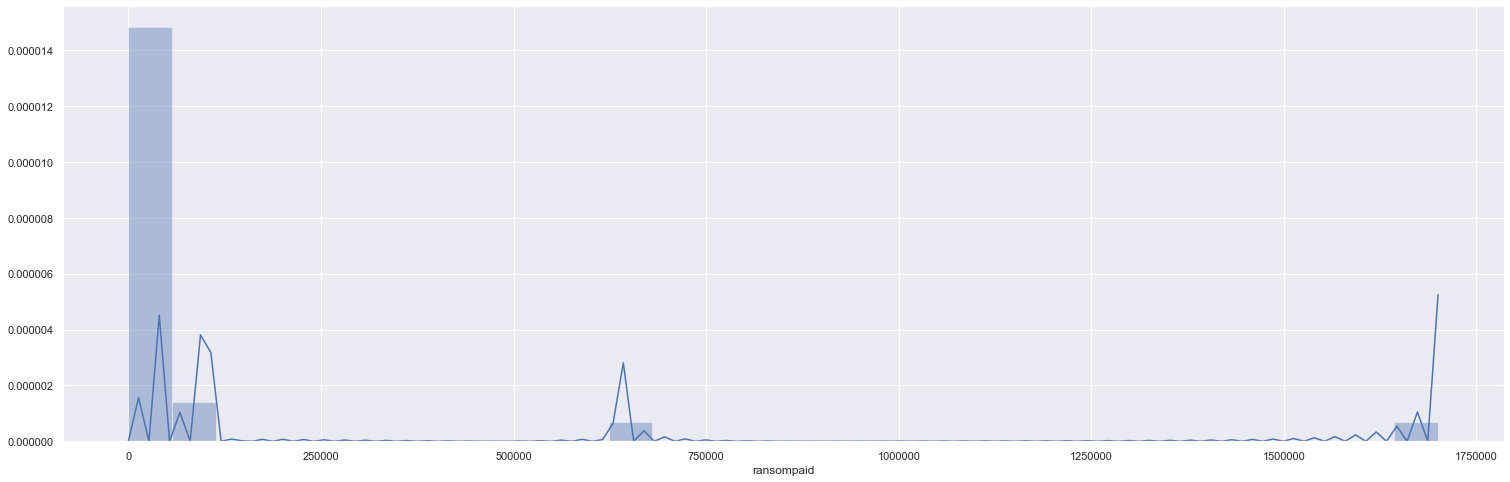

In [58]:
#Distribution plot of ransom amounts paid.
sns.distplot(aleph['ransompaid'],bins=30)

ax = pd.crosstab(aleph['ransomamt'],aleph['region_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(18,6)
#ax.grid(True, color = 'black')
ax = sns.set_style("whitegrid")
plt.show()

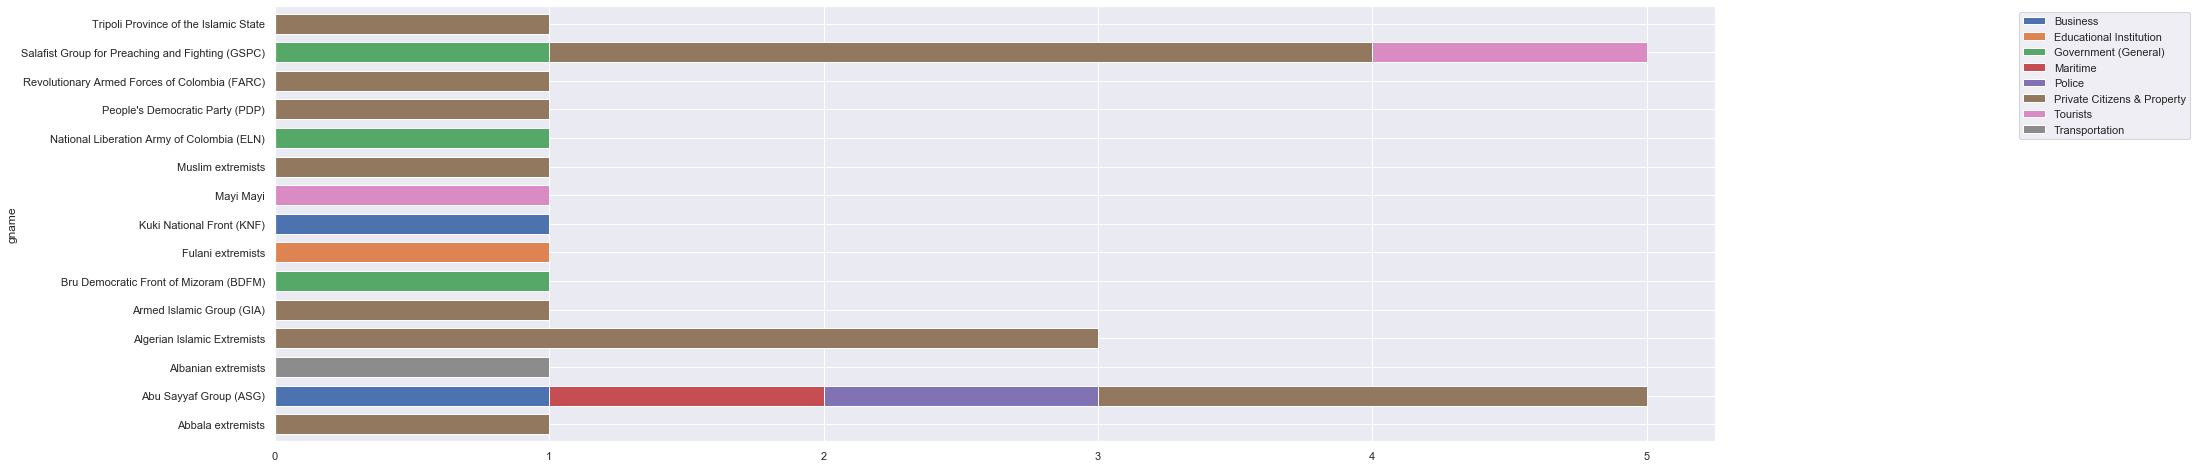

In [59]:
# do certrain groups have a certain type of target
aleph=aleph[aleph['targtype1_txt'].isin(aleph['targtype1_txt'].value_counts()[0:10].index)]
pd.crosstab(aleph['gname'],aleph['targtype1_txt']).plot.barh(stacked=True,figsize=(23,8),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.27,1))

# Data science on the dataset

In [60]:
#selected features / eliminated day, month, year / 

In [61]:
features = ['latitude', 'longitude','vicinity','doubtterr',
                'success','suicide','claimed','property','ishostkid','country_txt',
                'region','attacktype1_txt','targtype1_txt',
                'weaptype1_txt']

In [62]:
# target feature to predict the number of killed and wounded
target = 'killandwound'

In [63]:
#import models and scoring and encoders to format variables.
# Prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Data encoding from string to dummy
from sklearn.preprocessing import LabelEncoder

In [64]:
#i will be using the all the data from 1970-2018 - to fit data to. 
lb = LabelEncoder()
alephcopy['country_txt'] = lb.fit_transform(alephcopy['country_txt'])
alephcopy['attacktype1_txt'] = lb.fit_transform(alephcopy['attacktype1_txt'])
alephcopy['targtype1_txt'] = lb.fit_transform(alephcopy['targtype1_txt'])
alephcopy['weaptype1_txt'] = lb.fit_transform(alephcopy['weaptype1_txt'])

# Define X and Y.
X = alephcopy[features].fillna(0)
y = alephcopy['kwfinal']


In [65]:
#split the data into training set (30%) and test set(70%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [66]:
# i will do a decision tree classifier and random forest classifier and score the models.  I will then calculate the feature importances.


# Decision Tree Classifier

In [67]:
dtree = DecisionTreeClassifier()

In [68]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
dtpredictions = dtree.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [71]:
print(accuracy_score(y_test,dtpredictions))

0.8086525069637883


# Random Forest Classifier

In [72]:
rfc = RandomForestClassifier(n_estimators=600)

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
#Fit the data
rfcpredictions = rfc.predict(X_test)

In [75]:
#Print the accuracy score - comparing the predictions to the y test data
print(accuracy_score(y_test,rfcpredictions))

0.8370125348189416


In [76]:
#Rank the feature importances
feature_importances = pd.Series(rfc.feature_importances_,X.columns[::])
print(feature_importances)

latitude           0.184529
longitude          0.192237
vicinity           0.009313
doubtterr          0.024155
success            0.072858
suicide            0.017058
claimed            0.013597
property           0.054266
ishostkid          0.010692
country_txt        0.060129
region             0.040176
attacktype1_txt    0.117469
targtype1_txt      0.142154
weaptype1_txt      0.061368
dtype: float64


In [77]:
newfi = feature_importances.sort_values(ascending=False)

In [78]:
newfi

longitude          0.192237
latitude           0.184529
targtype1_txt      0.142154
attacktype1_txt    0.117469
success            0.072858
weaptype1_txt      0.061368
country_txt        0.060129
property           0.054266
region             0.040176
doubtterr          0.024155
suicide            0.017058
claimed            0.013597
ishostkid          0.010692
vicinity           0.009313
dtype: float64

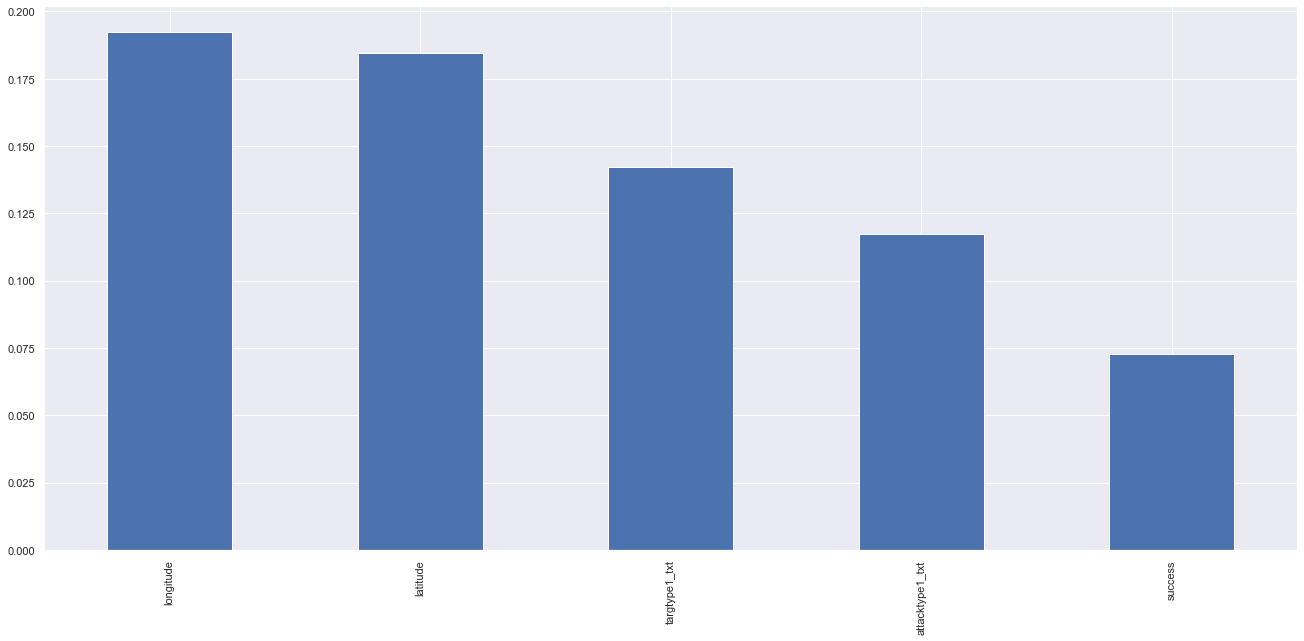

In [79]:
newfi[0:5].plot.bar(figsize=(20,10)) 
plt.show()

In [80]:
#Scatterplot plotting year against number of hostages taken

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


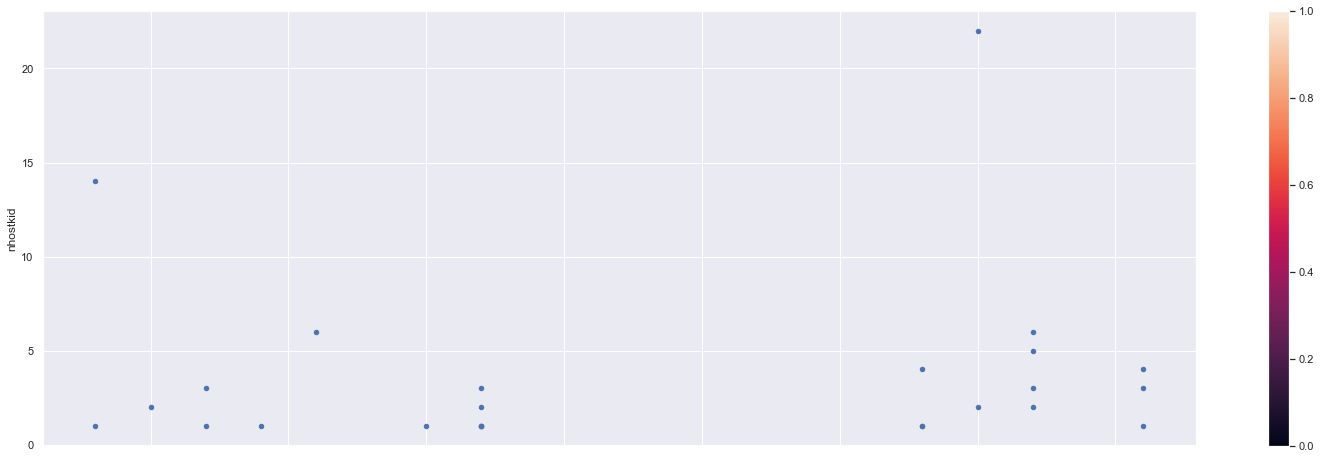

In [81]:
aleph.plot.scatter(x='iyear',y='nhostkid',cmap='coolwarm')

In [82]:
#Hexbin plot to show year against number of hostages taken

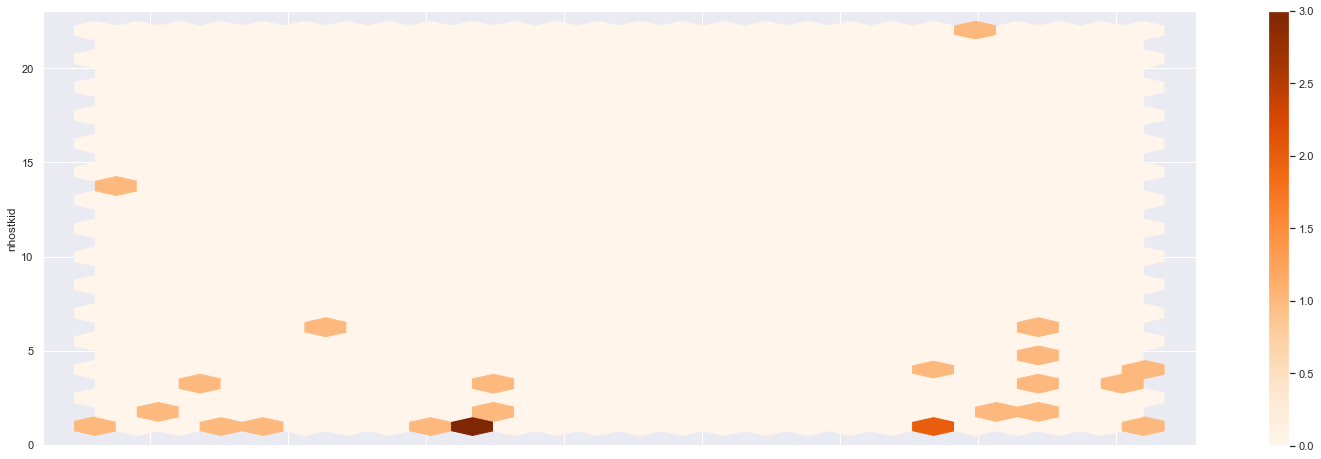

In [83]:
aleph.plot.hexbin(x='iyear',y='nhostkid',gridsize=25,cmap='Oranges')


In [84]:
#Kernal density estimation for number of hostages taken

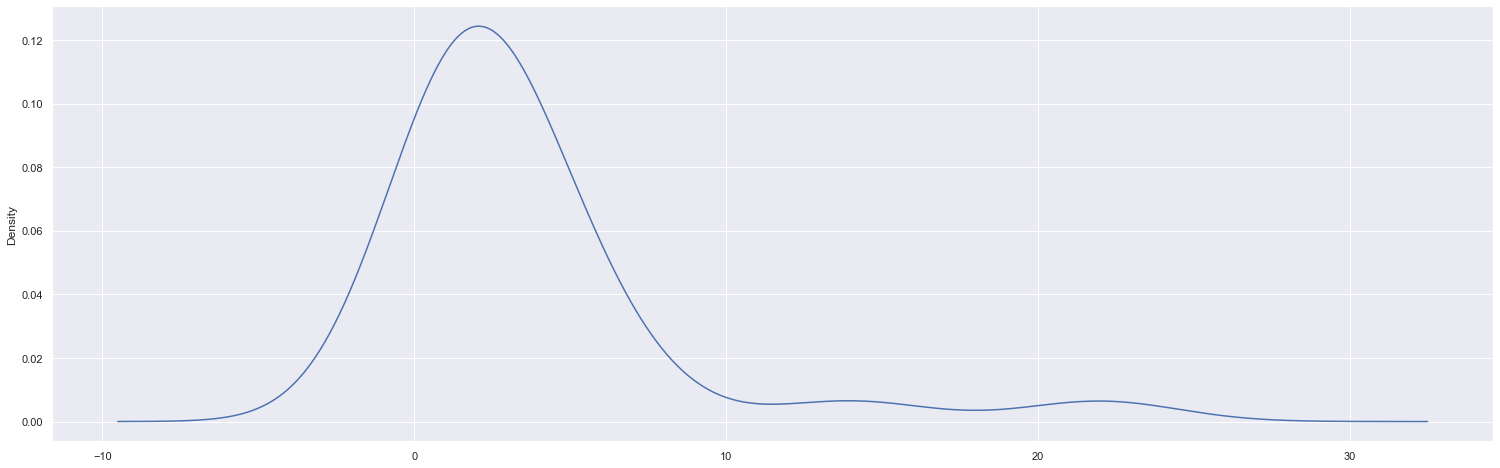

In [85]:
aleph['nhostkid'].plot.kde()

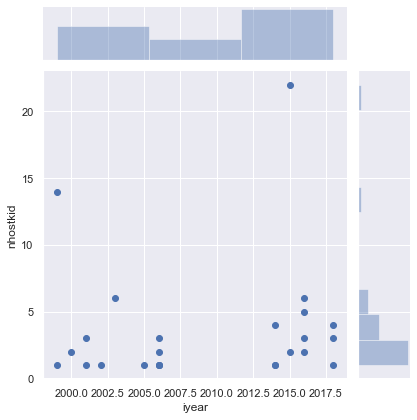

In [86]:
#jointplot to show year against the number of hostages taken.
sns.jointplot(x='iyear',y='nhostkid',data=aleph)

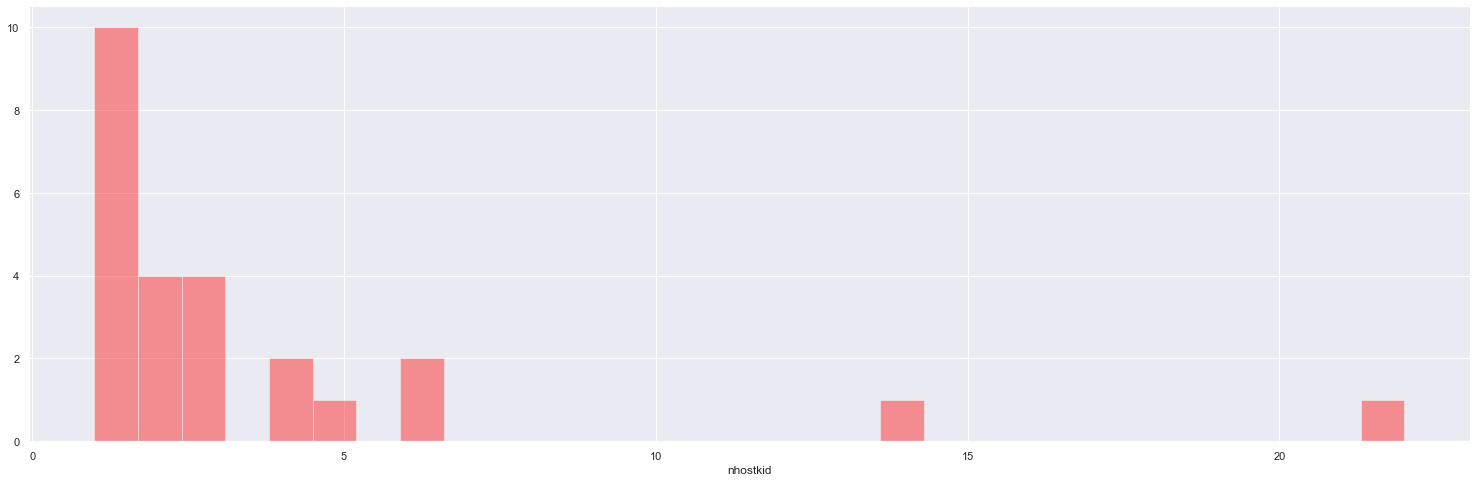

In [87]:
#seaborn distribution plot looking at the number of hostages taken.  Usually it is less than 5.
sns.distplot(aleph['nhostkid'],bins=30,kde=False,color='red')

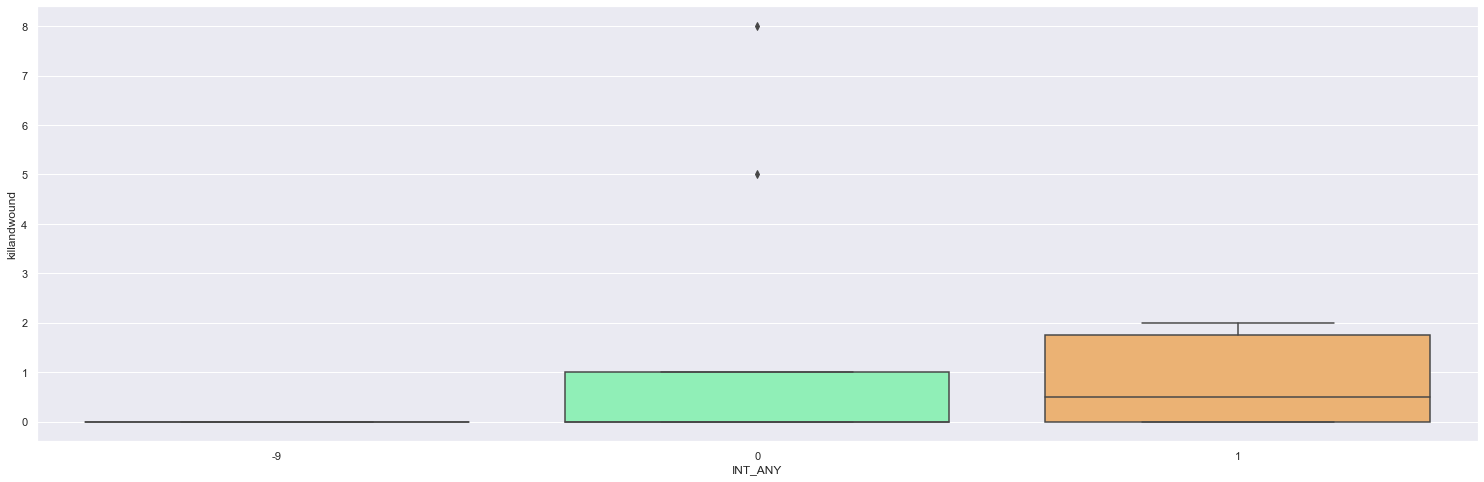

In [88]:
#1 = "Yes" The attack was international on any of the dimensions described above (logistically, ideologically, miscellaneous) 0 = "No" The attack was domestic on all of the dimensions described above (logistically, ideologically, miscellaneous) International terrorist events are associated with more kills and wounds 
sns.boxplot(x='INT_ANY',y='killandwound',data=aleph,palette='rainbow')

C:\Users\marcu\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning:

invalid value encountered in less

C:\Users\marcu\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning:

invalid value encountered in greater



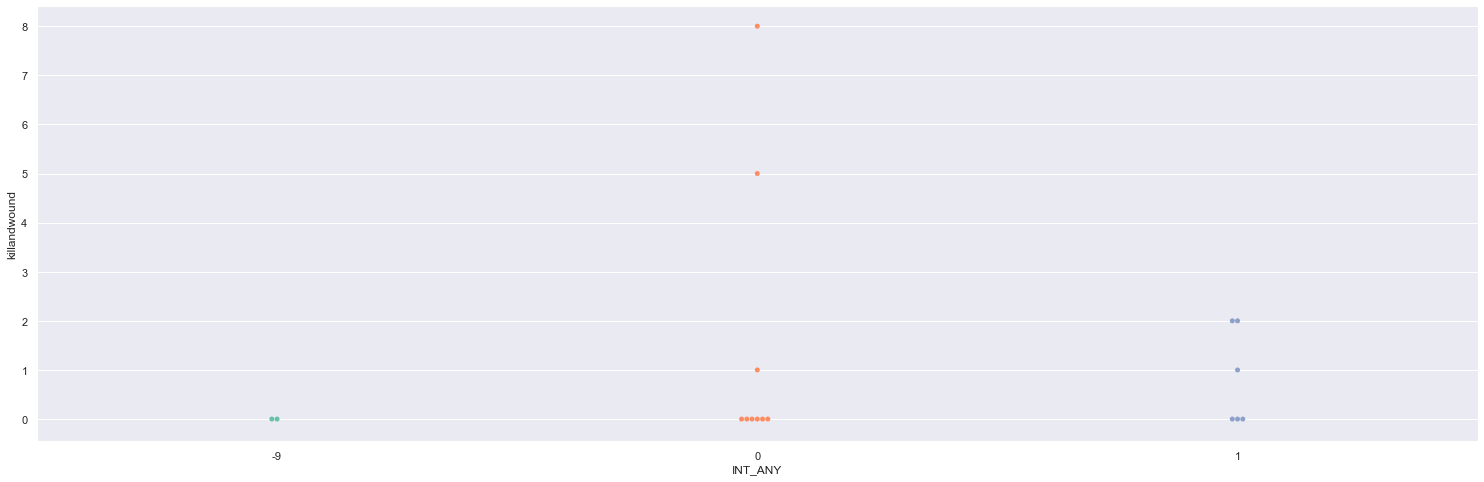

In [89]:
#swarmplot to show domestic versus international terrorist attacks - 
sns.swarmplot(x='INT_ANY',y='killandwound',data=aleph,palette='Set2')

Text(0.5, 1, 'aleph.corr()')

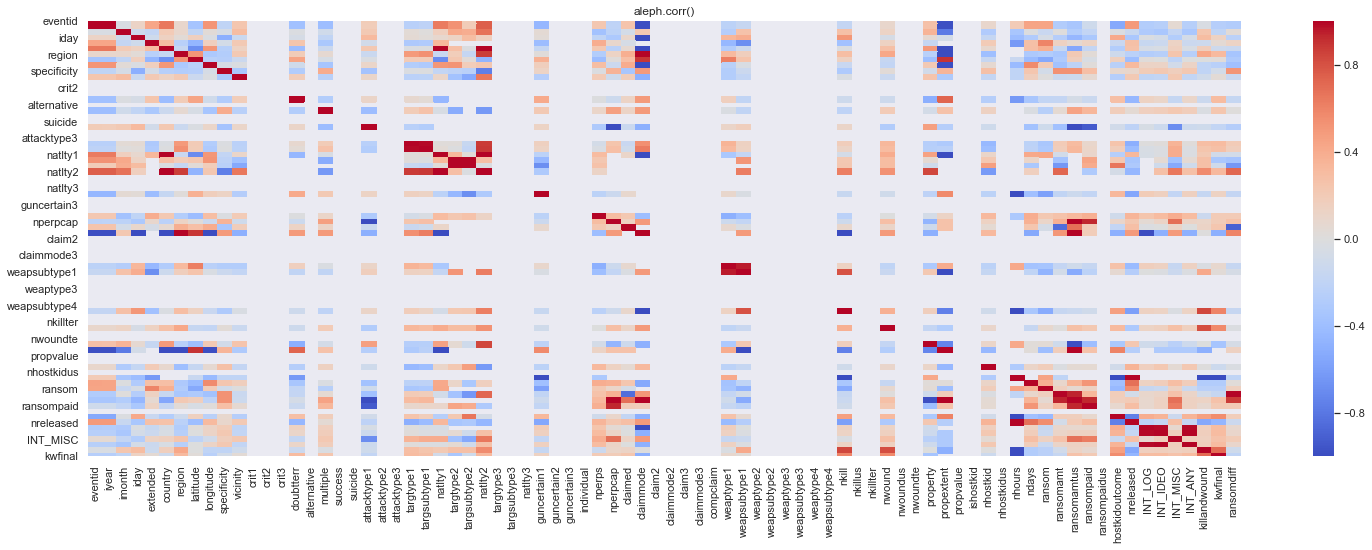

In [90]:
#heatmap to show correlation between all the features.
sns.heatmap(aleph.corr(),cmap='coolwarm')
plt.title('aleph.corr()')

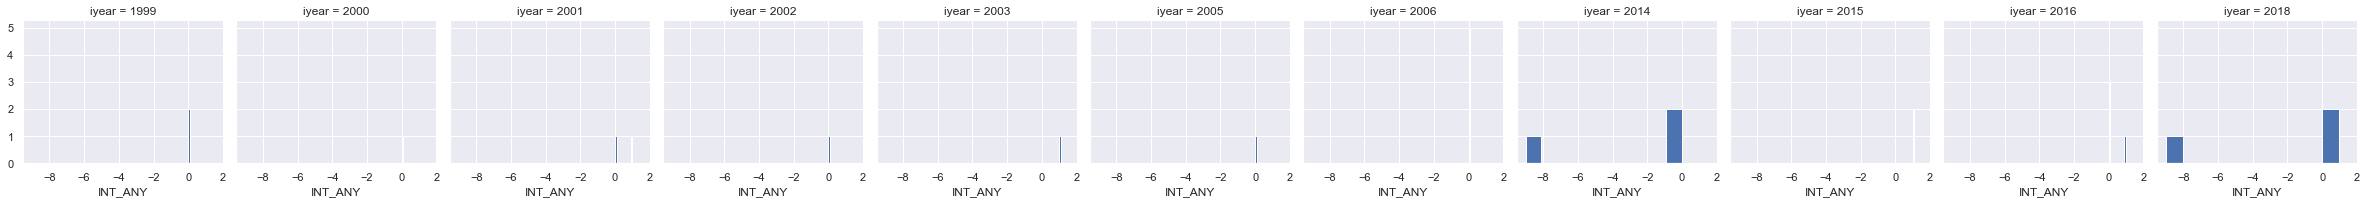

In [91]:
#Facetgrid to show any relationshop between INT_ANY and year.  This graph is no good though.
g = sns.FacetGrid(data=aleph,col='iyear')
g.map(plt.hist,'INT_ANY')

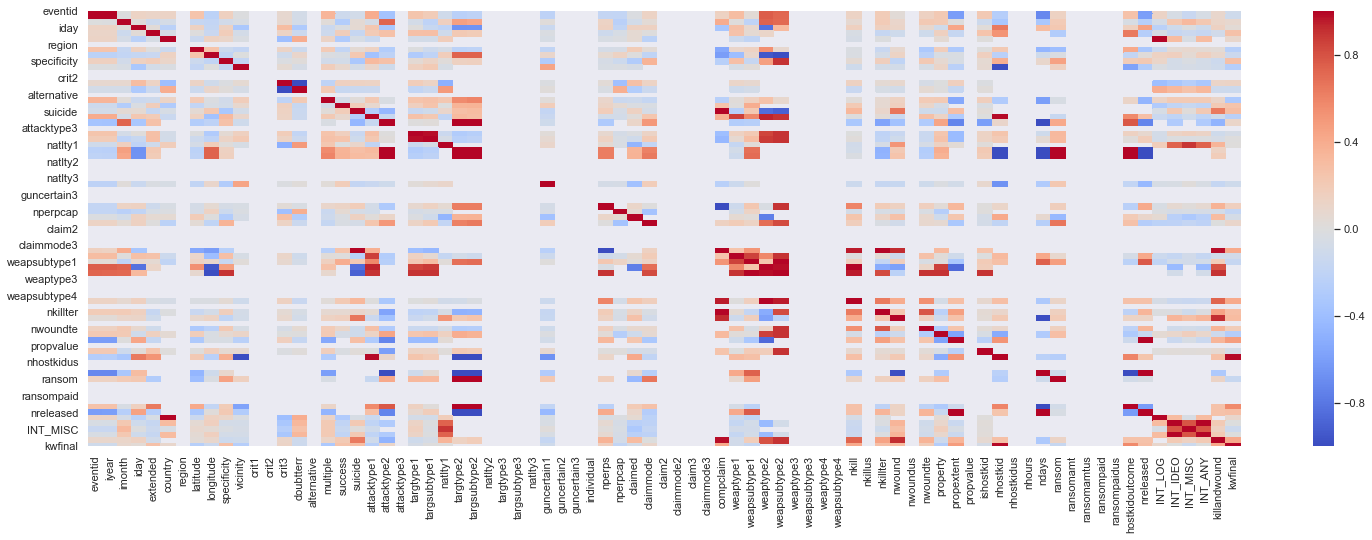

In [92]:
sns.heatmap(talibanfilter.corr(),cmap='coolwarm')

In [93]:
pd = alephcopy.pivot_table(values='nkill',index='imonth',columns='iyear')

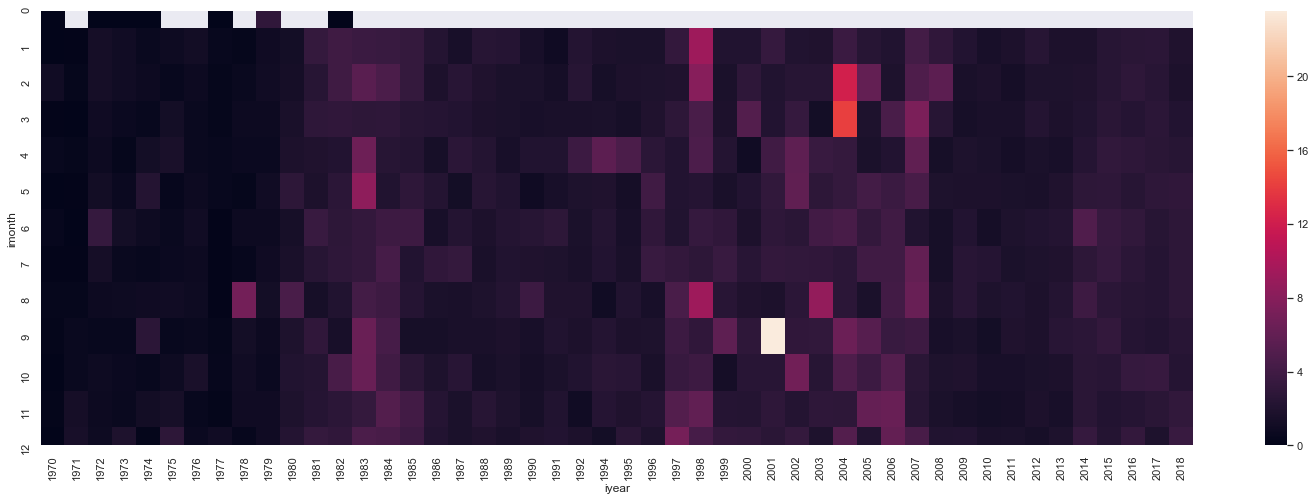

In [94]:
sns.heatmap(pd)

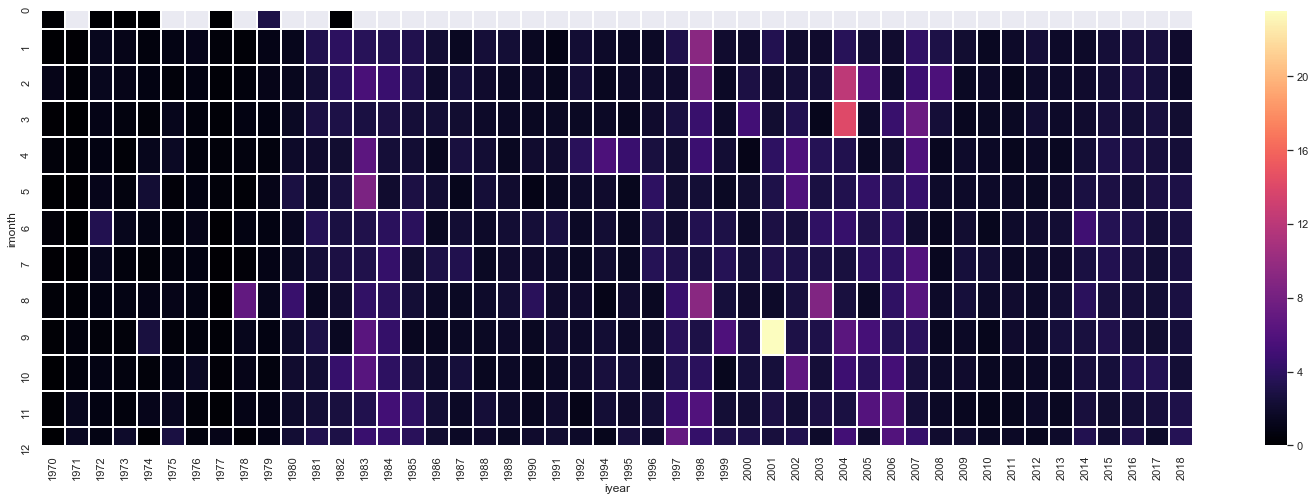

In [95]:
#Heatmap to show year against month and kills.
sns.heatmap(pd,cmap='magma',linecolor='white',linewidths=1)

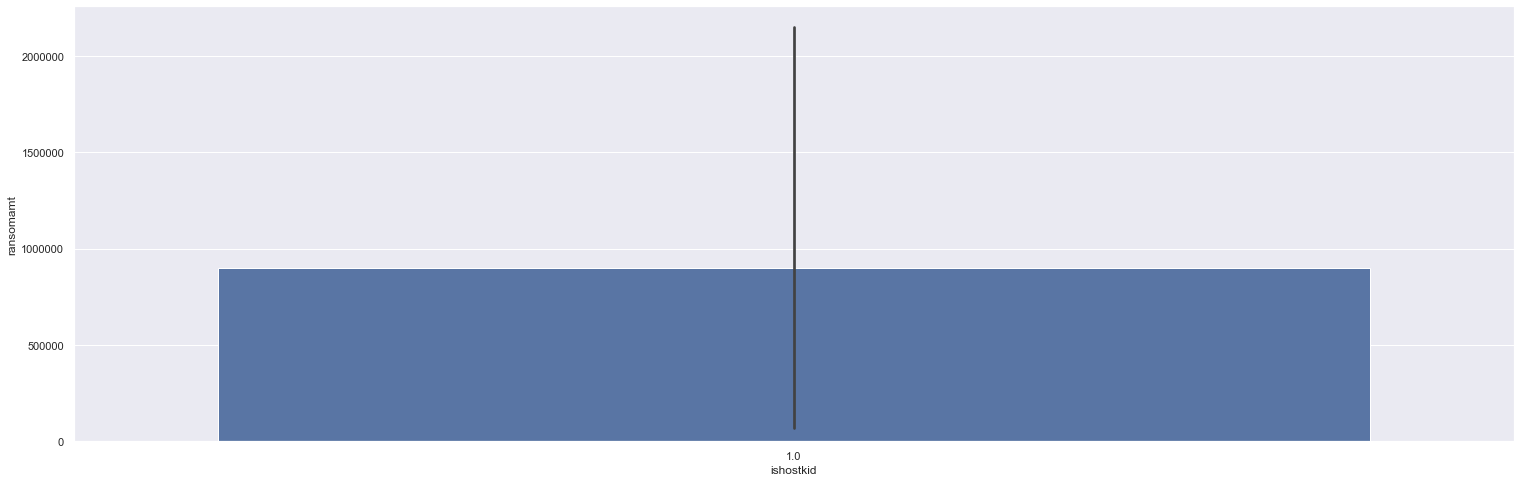

In [96]:
# a barplot to show of number of hostages against the ransom amount requested - usually 1 hostages is taken with a less than a million dollars requested in ransom.
sns.barplot(x='ishostkid',y='ransomamt',data=aleph)

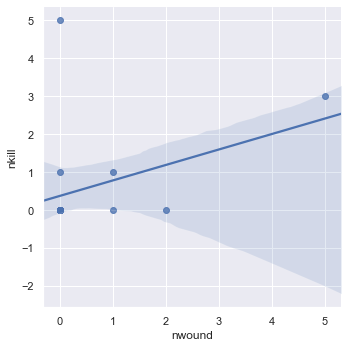

In [97]:
# linear plot between nwound and nkill - and the more that are wounded the more that are killed.
sns.lmplot(x='nwound',y='nkill',data=aleph)

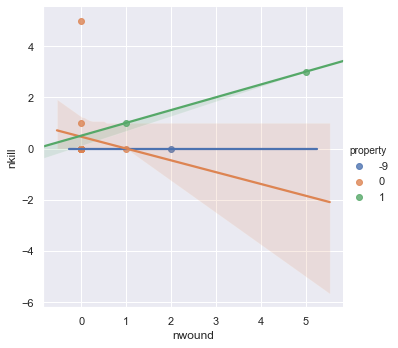

In [98]:
#property damage was linearally correlated to property damage.
sns.lmplot(x='nwound',y='nkill',data=aleph,hue='property')

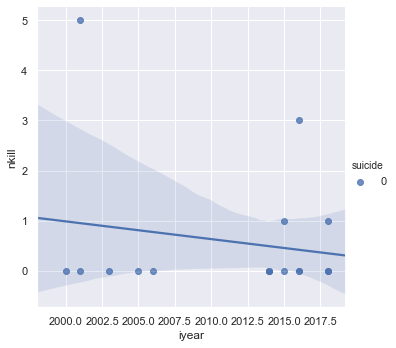

In [99]:
sns.lmplot(x='iyear',y='nkill',data=aleph,hue='suicide')
#1 = "Yes"  The incident was a suicide attack.  0 = "No"  There is no indication that the incident was a suicide attack. 

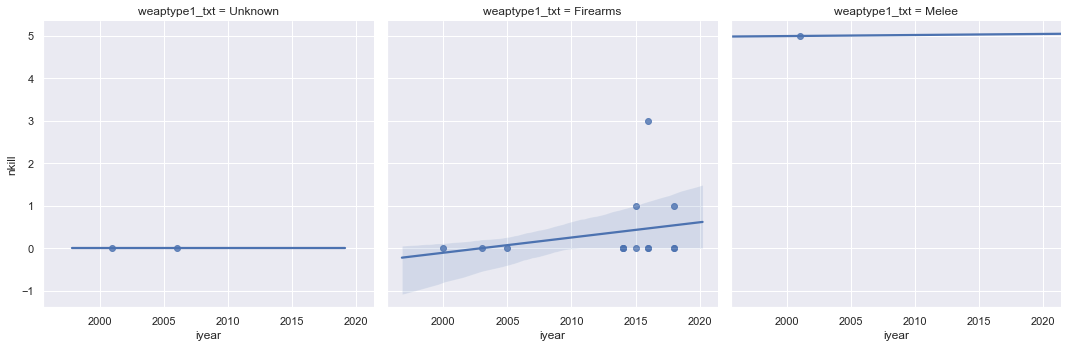

In [100]:
#looking for any patters between weapon type.  With firearms there is a slight increase year on year.
sns.lmplot(x='iyear',y='nkill',data=aleph,col='weaptype1_txt')

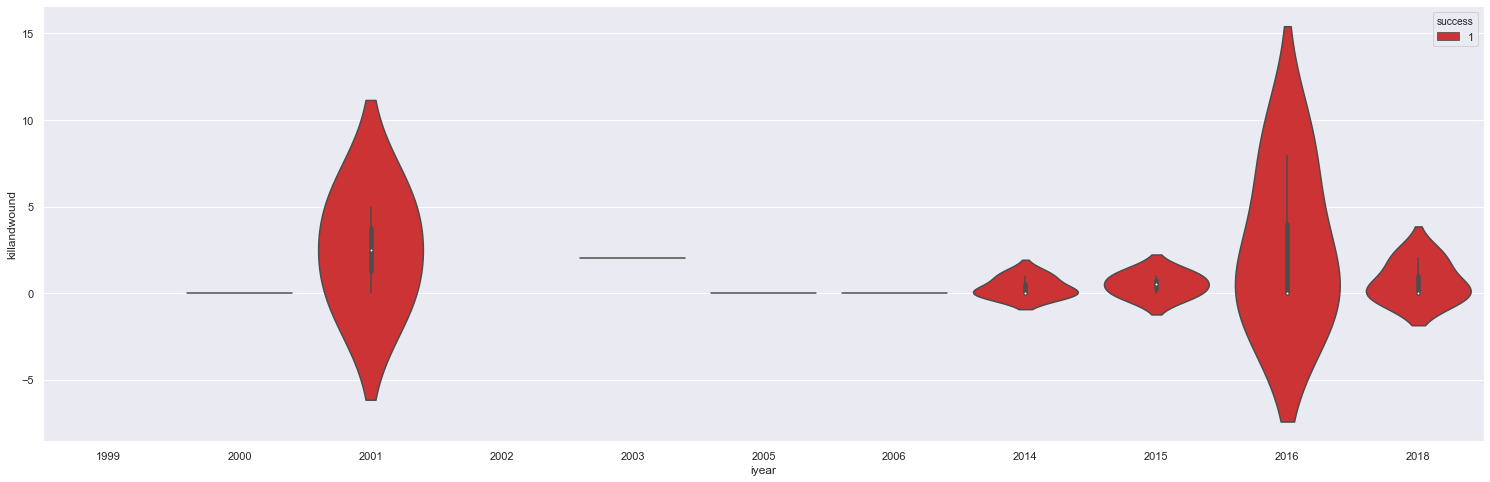

In [101]:
#seaborn violin plot of year against killandwound - hued by success.  Successful events showed high kills in  2001,2014,2015,2018
sns.violinplot(x="iyear", y="killandwound", data=aleph,hue='success',palette='Set1')

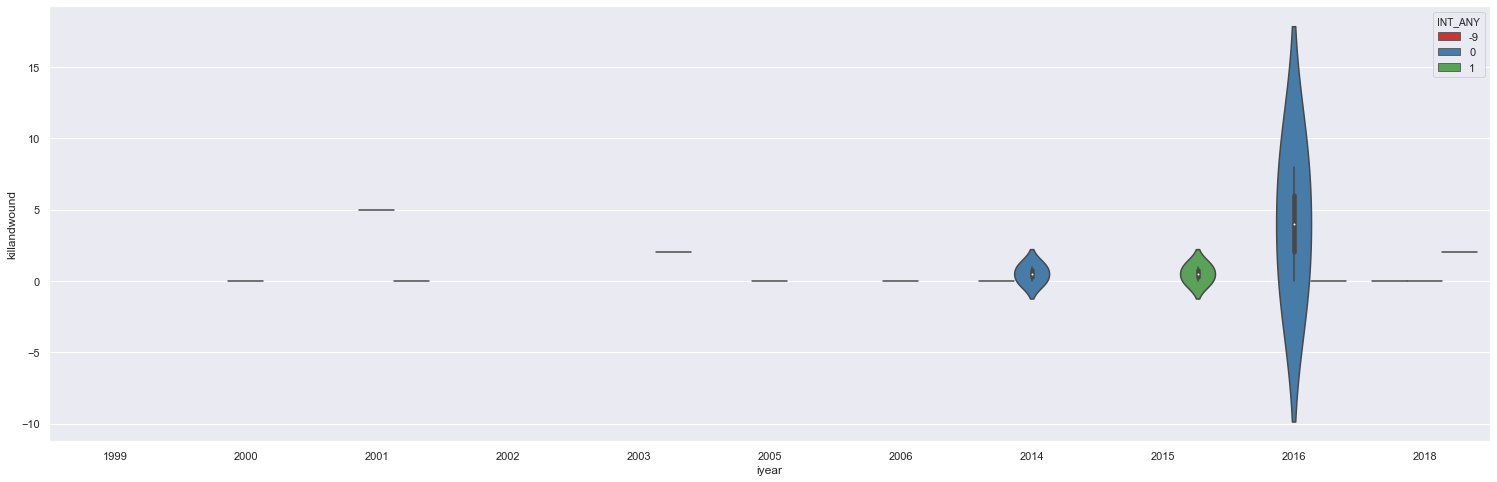

In [102]:
#The events in 2014 and 2016 are classed as domestic.  The event in 2015 is classed as international.
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_ANY',palette='Set1')

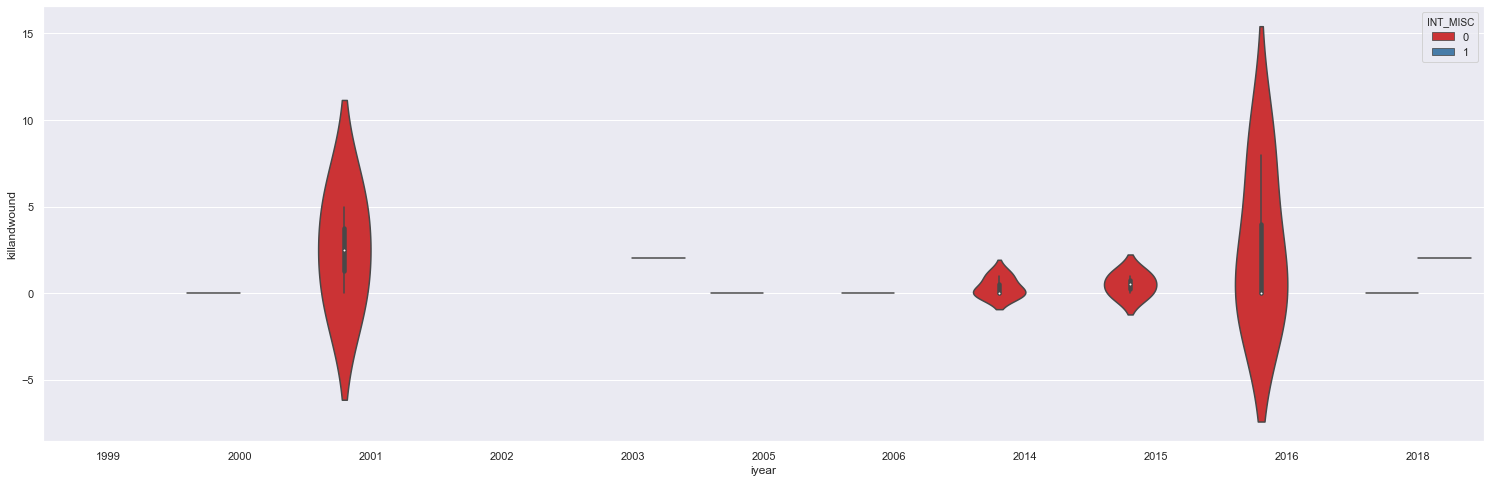

In [103]:
# 1 = "Yes" The attack was miscellaneous international; the location of the attack differs from the nationality of the target/victimns.
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_MISC',palette='Set1')

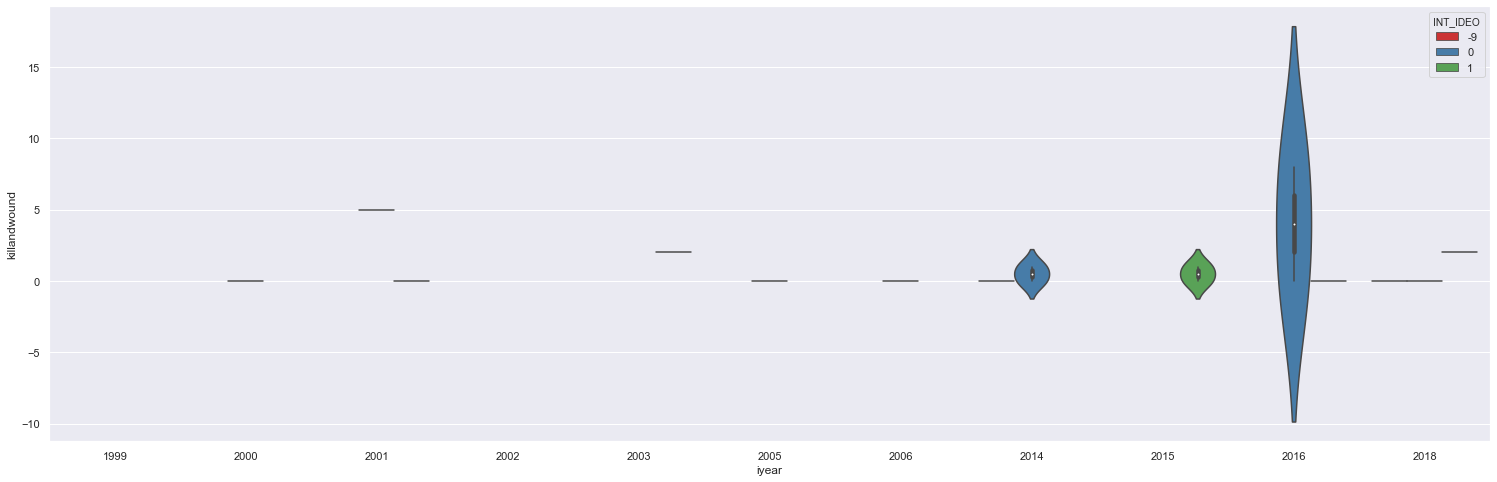

In [104]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_IDEO',palette='Set1')
#The attack was ideologically international; the nationality of the perpetrator group differs from the nationality of the target(s)/victim(s). If the perpetrator group or target is multinational, the attack is ideologically international. 

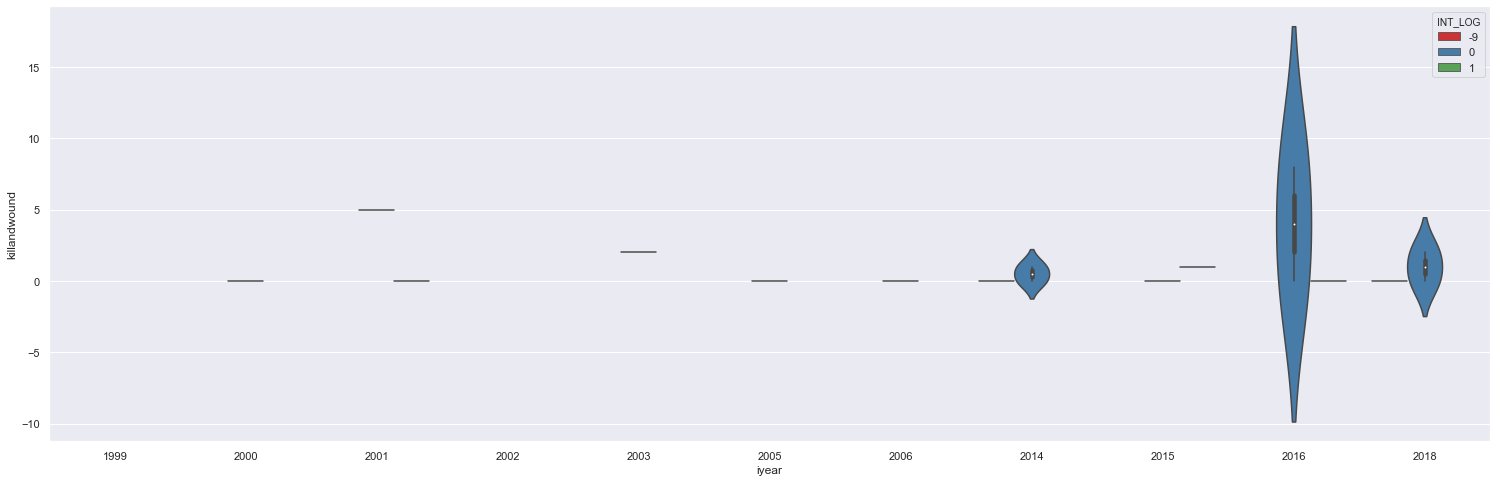

In [105]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_LOG',palette='Set1')
#The attack was logistically international; the nationality of the perpetrator group differs from the location of the attack. If the perpetrator group is multinational, the attack is logistically international if all of the group’s nationalities differ from the location of the attack. 

#sns.pairplot(aleph,hue='region_txt',palette='rainbow')

g = sns.JointGrid(x="nwound", y="nkill", data=aleph)
g = g.plot(sns.regplot, sns.distplot)

g = sns.JointGrid(x="country_txt", y="killandwound", data=aleph)
g = g.plot(sns.regplot, sns.distplot)

Text(0.5, 1.0, 'Weapon Types')

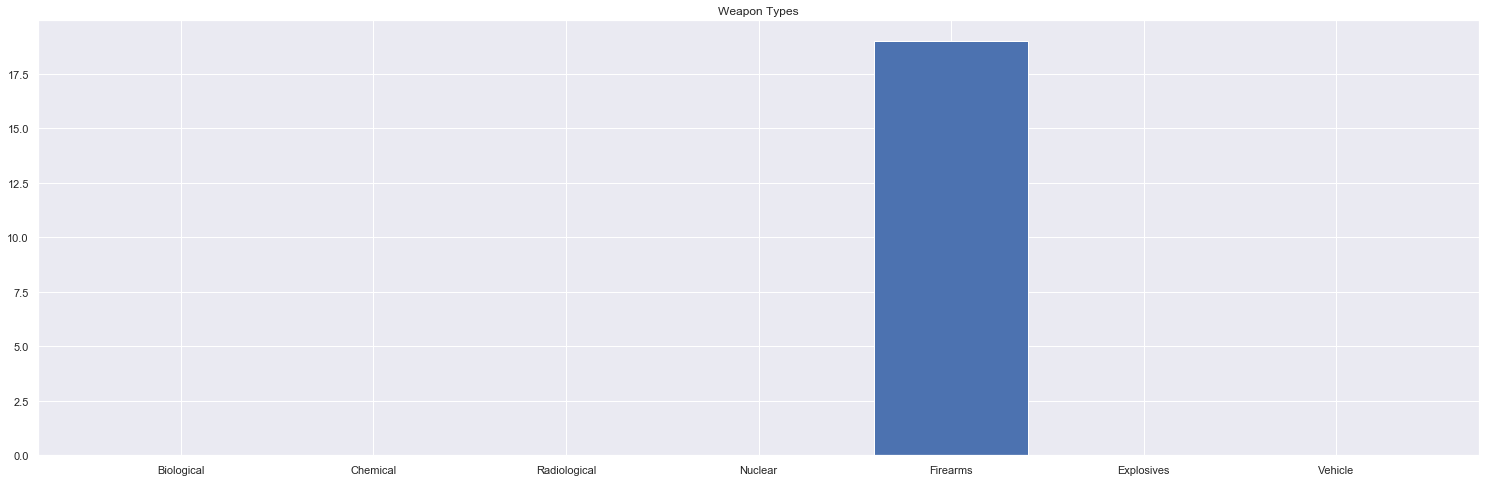

In [106]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.
aleph['weaptype1_txt'] == 'Biological'

countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
Type = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
Count = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(Type, Count)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Weapon Types')

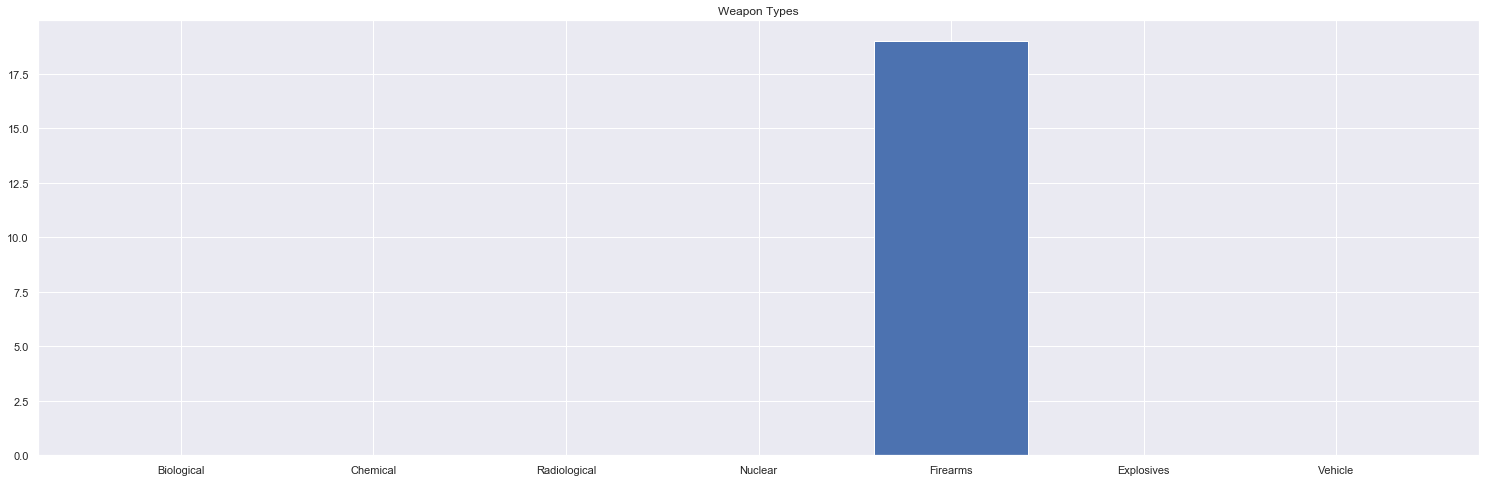

In [107]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.
talibanfilter['weaptype1_txt'] == 'Biological'

countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
weapType = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
weapCount = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(weapType, weapCount)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Weapon Types')

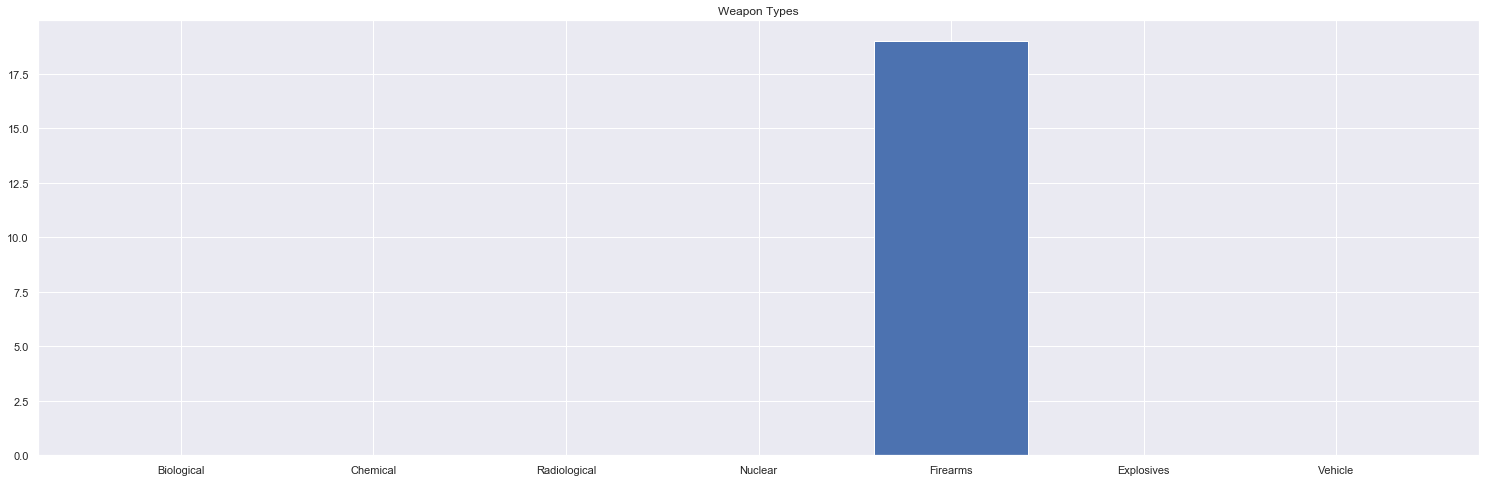

In [108]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.


countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
weapType = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
weapCount = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(weapType, weapCount)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Attack Types')

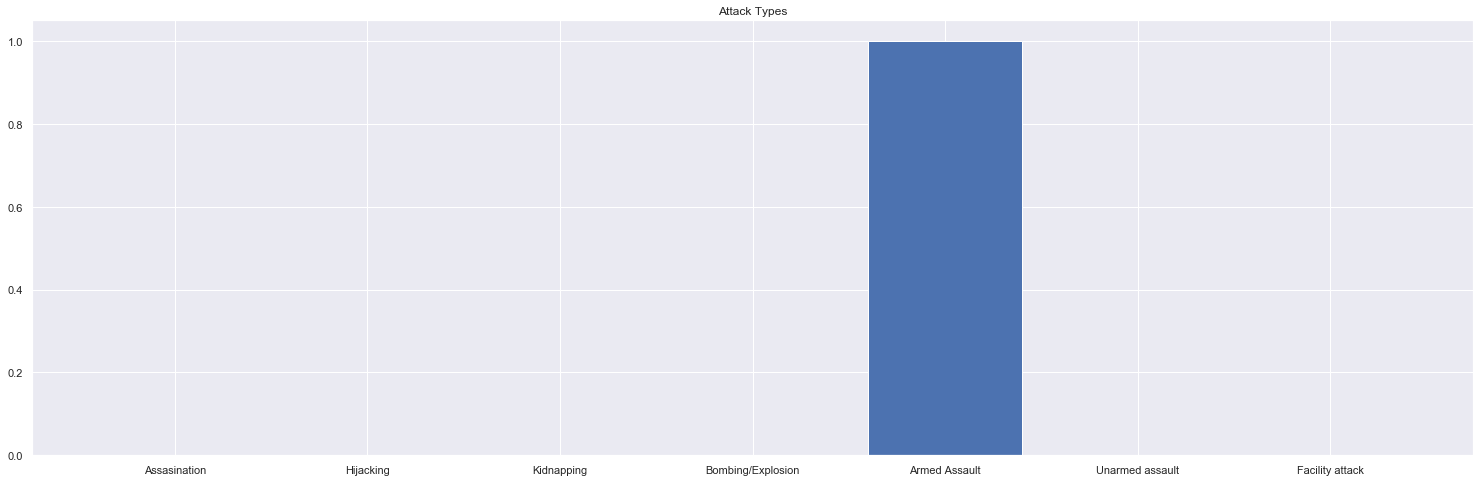

In [109]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.


counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')

Text(0.5, 1.0, 'Attack Types')

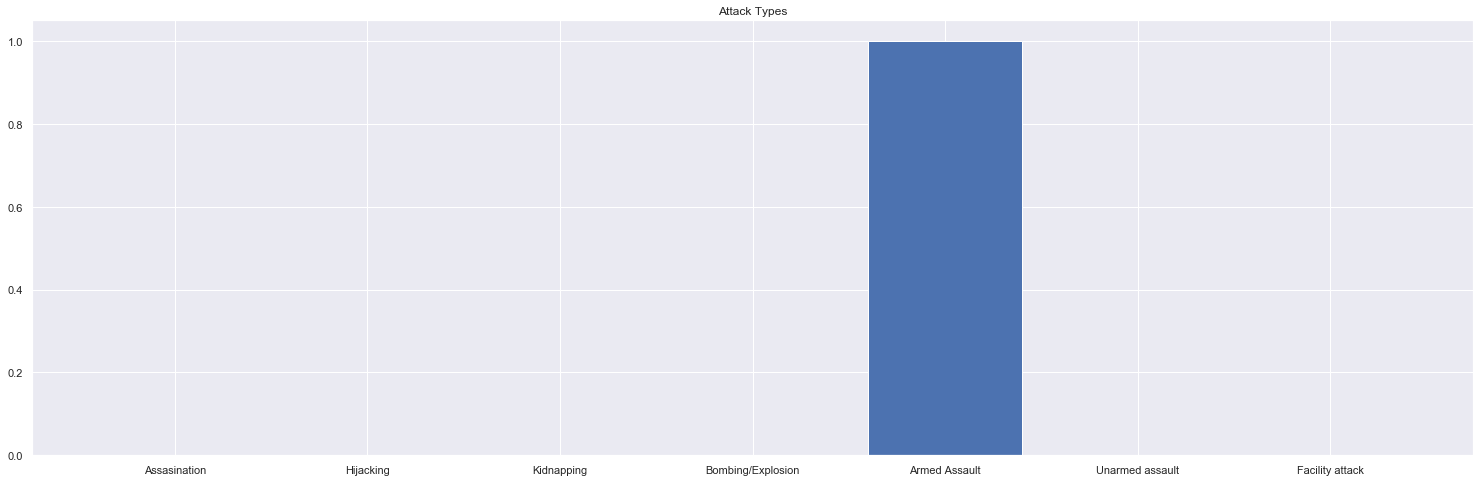

In [110]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.


counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')

Text(0.5, 1.0, 'Attack Types')

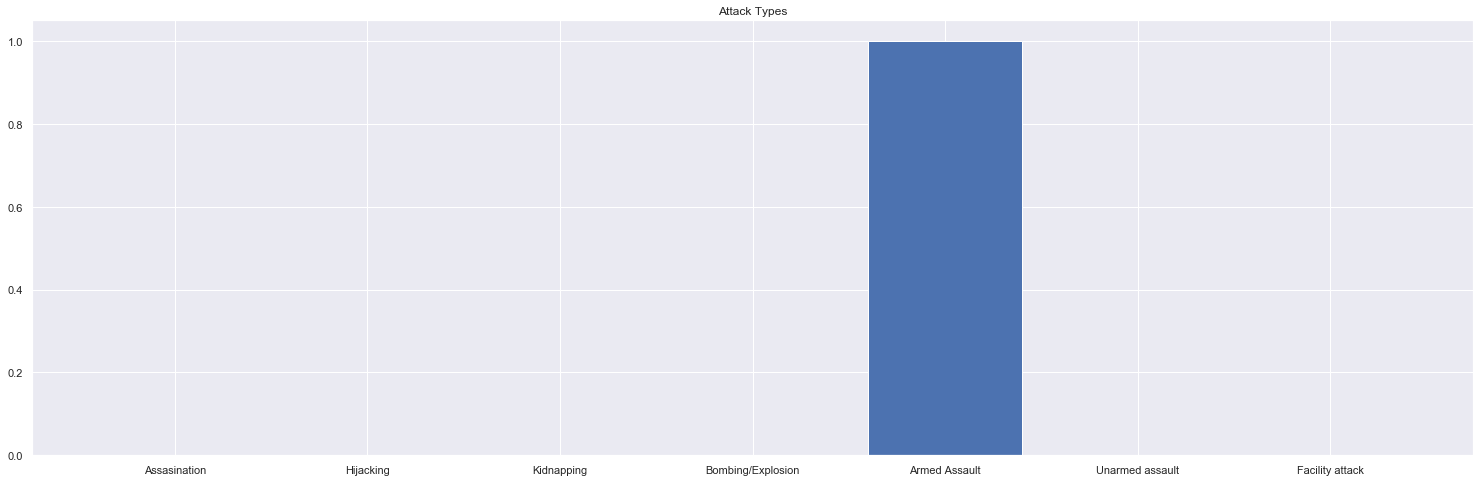

In [111]:
#a count of what type of weapon type it is.  Shows in the last 20 years the main weapon type use is explosives.

counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')